# Application of Supervised Learning Concepts to classify and target the customers and increase the converstion rate of liability customers to personal loan customers.

## Objective:    To predict the likelihood of a liability customer buying personal loans.

### Step 1: Importing necessary Libraries

In [4]:
import numpy as np # For doing algebric/mathematical calculation/operations.
import pandas as pd# For creating, analyzing/dataprocessing dataframes.
import matplotlib.pyplot as plt # For visualization of data.
import seaborn as sns           # For visualization of data.
from sklearn.preprocessing import OneHotEncoder #To convert the categorical into binary vectors.
from sklearn.preprocessing import StandardScaler  #To Normalize the data without changing the shape of the distribution.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #To split the data to do cross validation of the model. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #To test the multicollinearity between the features. 
import statsmodels.api as sm #To import necessary statical functions like lofit to do Logistic Regresion.
from sklearn import metrics #To do the performance test on the models like accuracy test using score function and also get other performance measures like precision, recall by obtaining classification report and confussion matrix. 
from sklearn.linear_model import LogisticRegression #For performing Logistic Regression using sci-kit learn package.
from sklearn.neighbors import KNeighborsClassifier #For using KNN algorithm.
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.metrics import accuracy_score #To measure the performance of the model.
from sklearn.metrics import recall_score #To obtain the recall score of the model.
from sklearn.metrics import roc_curve #To obtain fpr,tpr and thresholds also to plot ROC Curve.
from sklearn.metrics import roc_auc_score #To Fetch ROC AUC value
from sklearn.metrics import precision_recall_curve #Gives the precison, recall and thresholds also to Precion-Recall plot
from sklearn.metrics import f1_score # To Get harmonic mean of Precision and Recall.
from sklearn.metrics import auc # Gives the AUC of Precision and Recall.
import warnings #To eleminate future warnings.
warnings.filterwarnings(action = 'ignore') #To eleminate future warnings.

=====================================================================================================================

#### 1. Study the data distribution in each attribute, share your findings (15 marks):

### Step 2: Exploratory Data Analysis

#### a. Reading the Data:

In [5]:
data1 = pd.read_csv('Bank_Personal_Loan_Modelling.csv') #For Importing the data.
data1.head(10) #For visualizing the imported data.

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [43]:
print('Percentage of people who have accepted the loan:',(len(data1[data1['Personal Loan']==1]['CreditCard'])/len(data1['Personal Loan']))*100,'%')
print('Percentage of people who have not accepted the loan:',(len(data1[data1['Personal Loan']==0]['CreditCard'])/len(data1['Personal Loan']))*100,'%')

Percentage of people who have accepted the loan: 9.6 %
Percentage of people who have not accepted the loan: 90.4 %


#### b.Understanding the shape of the Data:

In [4]:
data1.shape #To know about the shape of the data.

(5000, 14)

##### Inference on the above output:

The data contains 5000 entries and 14 attributes (13 features and 1 label).

#### c.Understanding the informations about the Data:

In [362]:
data1.info() # Give all the informations regarding the no.of entries, no.of columns, dtatype of each attribute and memory size of that dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##### Inference on the above output:

There are around 5000 rows and 14 columns.
The type of Datatype our features are:
1. ID and ZIP Code is of Nominal data type category.
2. Age, Experience, Family and Education are of Ordinal data type category.
3. Personal Loan, Securities, Account,	CD Account,	Online and CreditCard are of Binary data types category.
4. Income, CCAvg and Mortgage are Discrete Quantitative data type.

#### d.Measure of central Tendancy:

#### 1. Mean:
Identifying mean for continuous data types alone.

In [363]:
data1[['Income', 'CCAvg']].mean().to_frame('Mean') #For identifying the mean.

Mean
Income  73.774200
CCAvg    1.937938

#### 2. Median:
Identifying Median for continuous data types alone

In [364]:
data1[['Income', 'CCAvg']].median().to_frame('Median') #For identifying the median.

Median
Income    64.0
CCAvg      1.5

#### 3. Mode:
a. Identifying Median for Categorical variables alone.

In [365]:
data1[[ 'ZIP Code', 'Age', 'Experience', 'Family', 'Education']].mode() #For identifying the mode.

ZIP Code  Age  Experience  Family  Education
0     94720   35          32       1          1

#### 4. Plotting the Mean, Median Mode for continuous variables:

##### a. For Feature Income:

Mean:  73.7742 
Median:  64.0 
Mode:  44


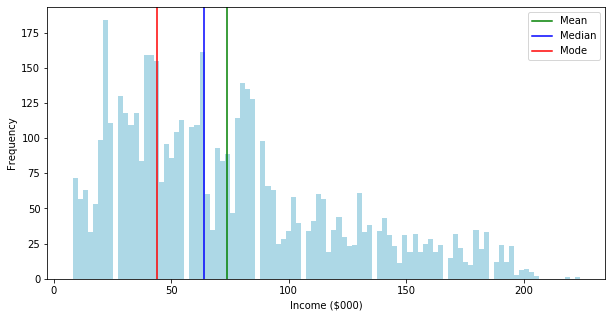

In [366]:
mean=data1['Income'].mean()
median=data1['Income'].median()
mode=data1['Income'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # To set the plot size.
plt.hist(data1['Income'],bins=100,color='lightblue') #Plotting the histogram

# Drawing lines on the plot for mean, median and mode.
plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')


plt.xlabel('Income ($000)')   # labeling the x-axis
plt.ylabel('Frequency')   # labeling the y-axis
plt.legend()              # Plotting the legend
plt.show()

##### a. For Feature CCAvg:

Mean:  1.9379380000000053 
Median:  1.5 
Mode:  0.3


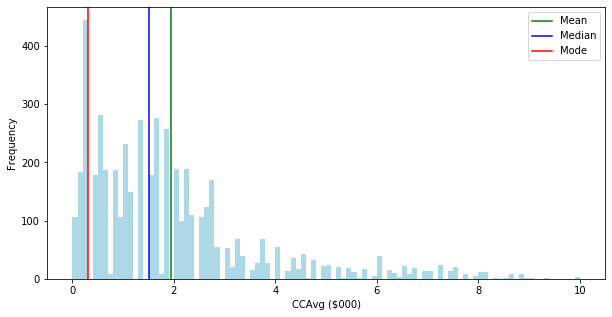

In [368]:
mean=data1['CCAvg'].mean()
median=data1['CCAvg'].median()
mode=data1['CCAvg'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # To set the plot size.
plt.hist(data1['CCAvg'],bins=100,color='lightblue') #Plot the histogram

# Drawing lines on the plot for mean, median and mode.
plt.axvline(mean,color='green',label='Mean')      
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')


plt.xlabel('CCAvg ($000)')   # labelling the x-axis
plt.ylabel('Frequency')   # labelling the y-axis
plt.legend()              # Ploting the legend
plt.show()

#### 5. Five number summary:

The Five point summary are:
1. Maximum value
2. 25% quartile
3. Median(50% quartile)
4. 75% quartile
5. Minimum value
    
The above mentioned five points for numerical attributes in the dataframe along with the other descriptive statistics are also available below.

In [369]:
data1.describe()# This function gives descriptive statistics of the numerical attributes which includes five points mentioned above. 

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

##### Infernce on the above output:
Five point summary can be taken from the above displayed table.
For eg let us take attribute age:
 1. min - 23 years old.
 2. 25% quartiles - 35 years old.
 3. 50% quartiles(median) - 45 years old.
 4. 75% quartiles - 55 years old.
 5. max - 67 years old. 
   
     similarly it can be done for all the other numerical vriables.
 
    From the above table we can infer central tendancy and measure of dispersion:
 For eg let us take attribute age:
  1. Measure of central tendancy here is medain(50%) - 45  years old
  2. Measure of Dispersion:
     
     a. Range: Max-Min = 44 years of deviation
     
     b. Inter Quartile Range: (75% quartiles) - (25% quartiles) = 20 years of deviation

#### The five point summary can also be visualized using the boxplot where the left end and right end of the whiskers represnt the min and max values respectively, the box represent 25%, 50%(median) and 75% quartiles.

Box plot for the same is displayed below

Text(0.7, 60, 'IQR')

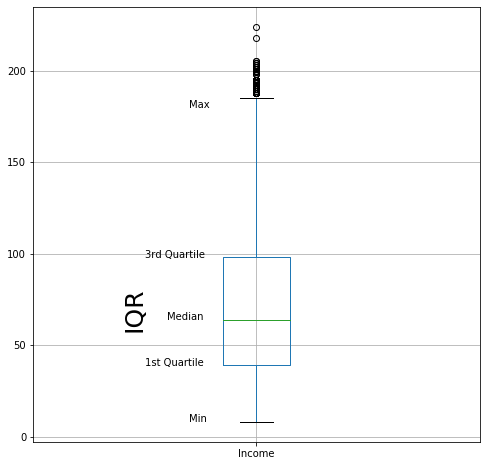

In [370]:
# Create boxplot for column="Income"
data1.boxplot(column="Income",return_type='axes',figsize=(8,8)) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.

# create text for x, y, s="3rd Quartile" like Median also for 1st Quartile, Min, Max and IQR:
plt.text(x=0.75, y=98, s="3rd Quartile")
plt.text(x=0.8, y=64.00, s="Median")
plt.text(x=0.75, y=39.0, s="1st Quartile")
plt.text(x=0.85, y=8.00, s="Min")
plt.text(x=0.85, y=180.00, s="Max")
plt.text(x=0.7, y=60, s="IQR", rotation=90, size=25)

##### Inference for the above plot:
1. The left end and right end of the whiskers represnt the min(23 years old) and max(67 years old) values respectively.
2. The box represent 25% quartiles - 35years old, 50% quartiles(median)- 45years old and 75% quartiles- 55years old.

### Univariate Analysis:

#### 6.Distribution of 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',	'Securities Account', 'CD Account', 'Online' and 'CreditCard ' columns. 

a. Univariate analysis for Quantitative Datatypes:

#### 1. Distribution of Income:

Skewness:  0.8413386072610816


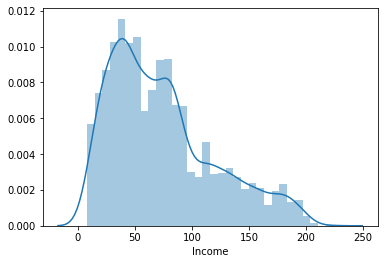

In [371]:
sns.distplot(data['Income']) # distplot fuction is used here to visualize the distribution of the data with kernel density estiamation.
skew = data1['Income'].skew() # Here Skew function from Scipy.stats package is used to measure skewness.
print('Skewness: ',skew )

##### Inference for the above plot:
1. Skewnwess value is close to 1 therefore the data is Right tailed. 
2. Frequencies of very high income is lesser than frequencies of very low income.  

#### 2. Distribution of CCAvg:

Skewness:  1.5984433366678663


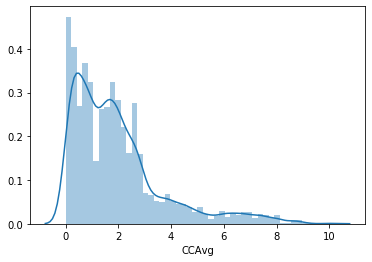

In [372]:
sns.distplot(data1['CCAvg']) # distplot fuction is used here to visualize the distribution of the data with kernel density estiamation.
skew = data1['CCAvg'].skew() # Here Skew function from Scipy.stats package is used to measure skewness.
print('Skewness: ',skew )

##### Inference for the above plot:
1. Skewnwess value is >1 therefore the data is heavily Right tailed. 
2. Frequencies of very high expences is lesser than frequencies of very low expences.

b. Univariate analysis for quantitative datatypes:

#### 3. Distribution of Age:

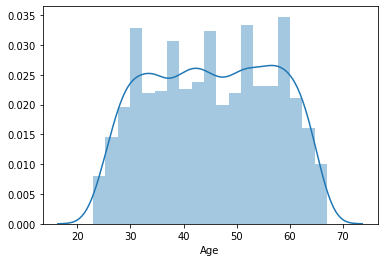

In [373]:
sns.distplot(data1['Age'])  # distplot fuction is used here to visualize the distribution of the data with kernel density estiamation.

##### Inference for the above plot:
1. The distribution seems to be multimodal.
2. Data is with more info on age between 30 to 60 years.

#### 4. Distribution of Income:

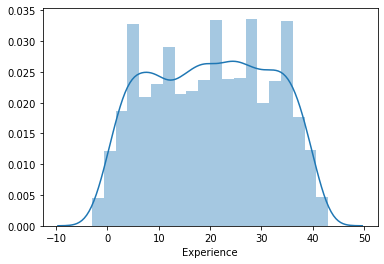

In [374]:
 sns.distplot(data1['Experience'])  # distplot fuction is used here to visualize the distribution of the data with kernel density estiamation.

##### Inference for the above plot:
1. The distribution seems to be multimodal.
2. Contain many negative values.
3. Data contains informtion on people with 0 to 40 years of experience

#### 5. Distribution of Family:

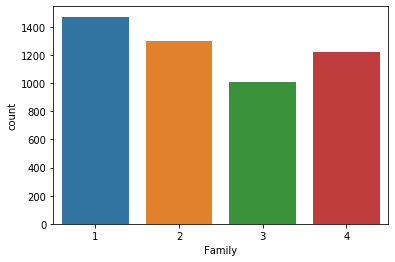

In [375]:
sns.countplot(data1['Family']) # To see the distribution of the categorical varable.

In [53]:
print('Percentage of Family with one member:', round(len(data1[data1['Family'] ==1])/len(data1['Family'])*100,2),'%')
print('Percentage of Family with two member:', round(len(data1[data1['Family'] ==2])/len(data1['Family'])*100,2),'%')
print('Percentage of Family with three member:', round(len(data1[data1['Family'] ==3])/len(data1['Family'])*100,2),'%')
print('Percentage of Family with three member:', round(len(data1[data1['Family'] ==4])/len(data1['Family'])*100,2),'%')

Percentage of Family with one member: 29.44 %
Percentage of Family with two member: 25.92 %
Percentage of Family with three member: 20.2 %
Percentage of Family with three member: 24.44 %


##### Inference for the above plot:
1. There are four categories in the Family attribute.
2. The four classes are imbalance to each other.

#### 6. Distribution of Education:

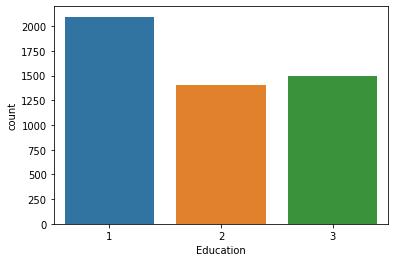

In [376]:
sns.countplot(data1['Education']) # To see the distribution of the categorical varable.

In [52]:
print('Percentage of people who are Undergrad:', round(len(data1[data1['Education'] ==1])/len(data1['Education'])*100,2),'%')
print('Percentage of people who are Graduate:', round(len(data1[data1['Education'] ==2])/len(data1['Education'])*100,2),'%')
print('Percentage of people who are Advanced/Proffessional:', round(len(data1[data1['Education'] ==3])/len(data1['Education'])*100,2),'%')

Percentage of people who are Undergrad: 41.92 %
Percentage of people who are Graduate: 28.06 %
Percentage of people who are Advanced/Proffessional: 30.02 %


##### Inference for the above plot:
1. The Education Feature contains three classes where all the thre dont have same no. of people.
Therefore, data is imbalanced.

#### Get the target column distribution. Your comments (5 marks):

#### 7. Distribution of Personal Loan:

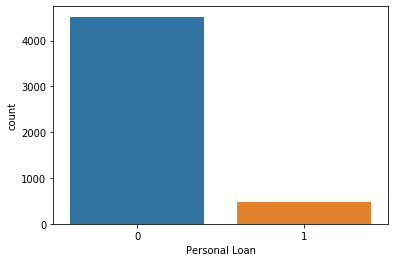

In [377]:
sns.countplot(data1['Personal Loan']) # To see the distribution of the categorical varable.

In [43]:
print('Percentage of people who have accepted the loan:',(len(data1[data1['Personal Loan']==1]['CreditCard'])/len(data1['Personal Loan']))*100,'%')
print('Percentage of people who have not accepted the loan:',(len(data1[data1['Personal Loan']==0]['CreditCard'])/len(data1['Personal Loan']))*100,'%')

Percentage of people who have accepted the loan: 9.6 %
Percentage of people who have not accepted the loan: 90.4 %


##### Inference for the above plot:
1. People who are having loan are comparatively lesser than people who dont have loan.
2. Data is highly imbalanced.


#### 8. Distribution of Securities Account:

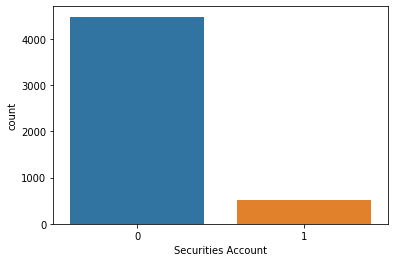

In [378]:
sns.countplot(data1['Securities Account']) # To see the distribution of the categorical varable.

In [55]:
print('Percentage of people having Security Account:', round(len(data1[data1['Securities Account'] ==1])/len(data1['Securities Account'])*100,2),'%')
print('Percentage of people not having Security Account:', round(len(data1[data1['Securities Account'] ==0])/len(data1['Securities Account'])*100,2),'%')

Percentage of people having Security Account: 10.44 %
Percentage of people not having Security Account: 89.56 %


##### Inference for the above plot:
1. People who are having Securities Account are comparatively lesser than people who dont have Securities Account.
2. Data is highly imbalanced.


#### 9. Distribution of CD Account:

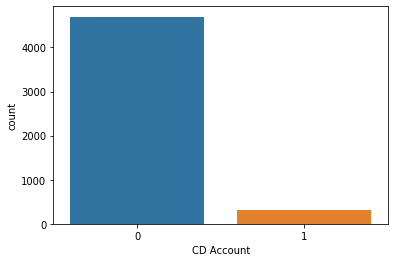

In [379]:
sns.countplot(data1['CD Account']) # To see the distribution of the categorical varable.

In [56]:
print('Percentage of people having CD Account:', round(len(data1[data1['CD Account'] ==1])/len(data1['CD Account'])*100,2),'%')
print('Percentage of people not having CD Account:', round(len(data1[data1['CD Account'] ==0])/len(data1['CD Account'])*100,2),'%')

Percentage of people having CD Account: 6.04 %
Percentage of people not having CD Account: 93.96 %


##### Inference for the above plot:
1. People who are having Certificate of Deposit Account are comparatively lesser than people who dont have Certificate of Deposit Account.
2. Data is highly imbalanced.


#### 10. Distribution of Online:

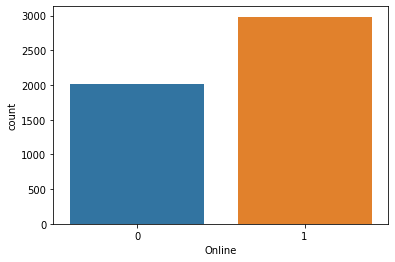

In [380]:
sns.countplot(data1['Online']) # To see the distribution of the categorical varable.

In [57]:
print('Percentage of people using Online:', round(len(data1[data1['Online'] ==1])/len(data1['Online'])*100,2),'%')
print('Percentage of people not using Online:', round(len(data1[data1['Online'] ==0])/len(data1['Online'])*100,2),'%')

Percentage of people using Online: 59.68 %
Percentage of people not using Online: 40.32 %


##### Inference for the above plot:
1. Customers using internet banking are more compared to people who are not having internet banking.
2. Data is imbalanced.


#### 11. Distribution of CreditCard:

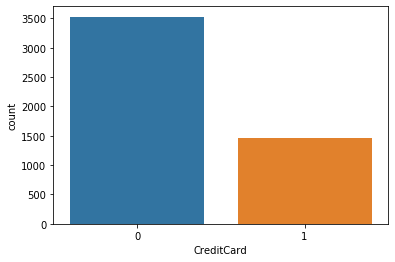

In [381]:
sns.countplot(data1['CreditCard']) # To see the distribution of the categorical varable.

In [58]:
print('Percentage of people using CreditCard:', round(len(data1[data1['CreditCard'] ==1])/len(data1['CreditCard'])*100,2),'%')
print('Percentage of people not using CreditCard:', round(len(data1[data1['CreditCard'] ==0])/len(data1['CreditCard'])*100,2),'%')

Percentage of people using CreditCard: 29.4 %
Percentage of people not using CreditCard: 70.6 %


##### Inference for the above plot:
1. People using Credit Cards are less compare to people who are not using Credit Cards.
2. Data is imbalanced.


### Bivariate Analysis:

In this let us see visually how the target variable is influenced by the other attributes. 

#### Categorical Variable vs Categorical Variables

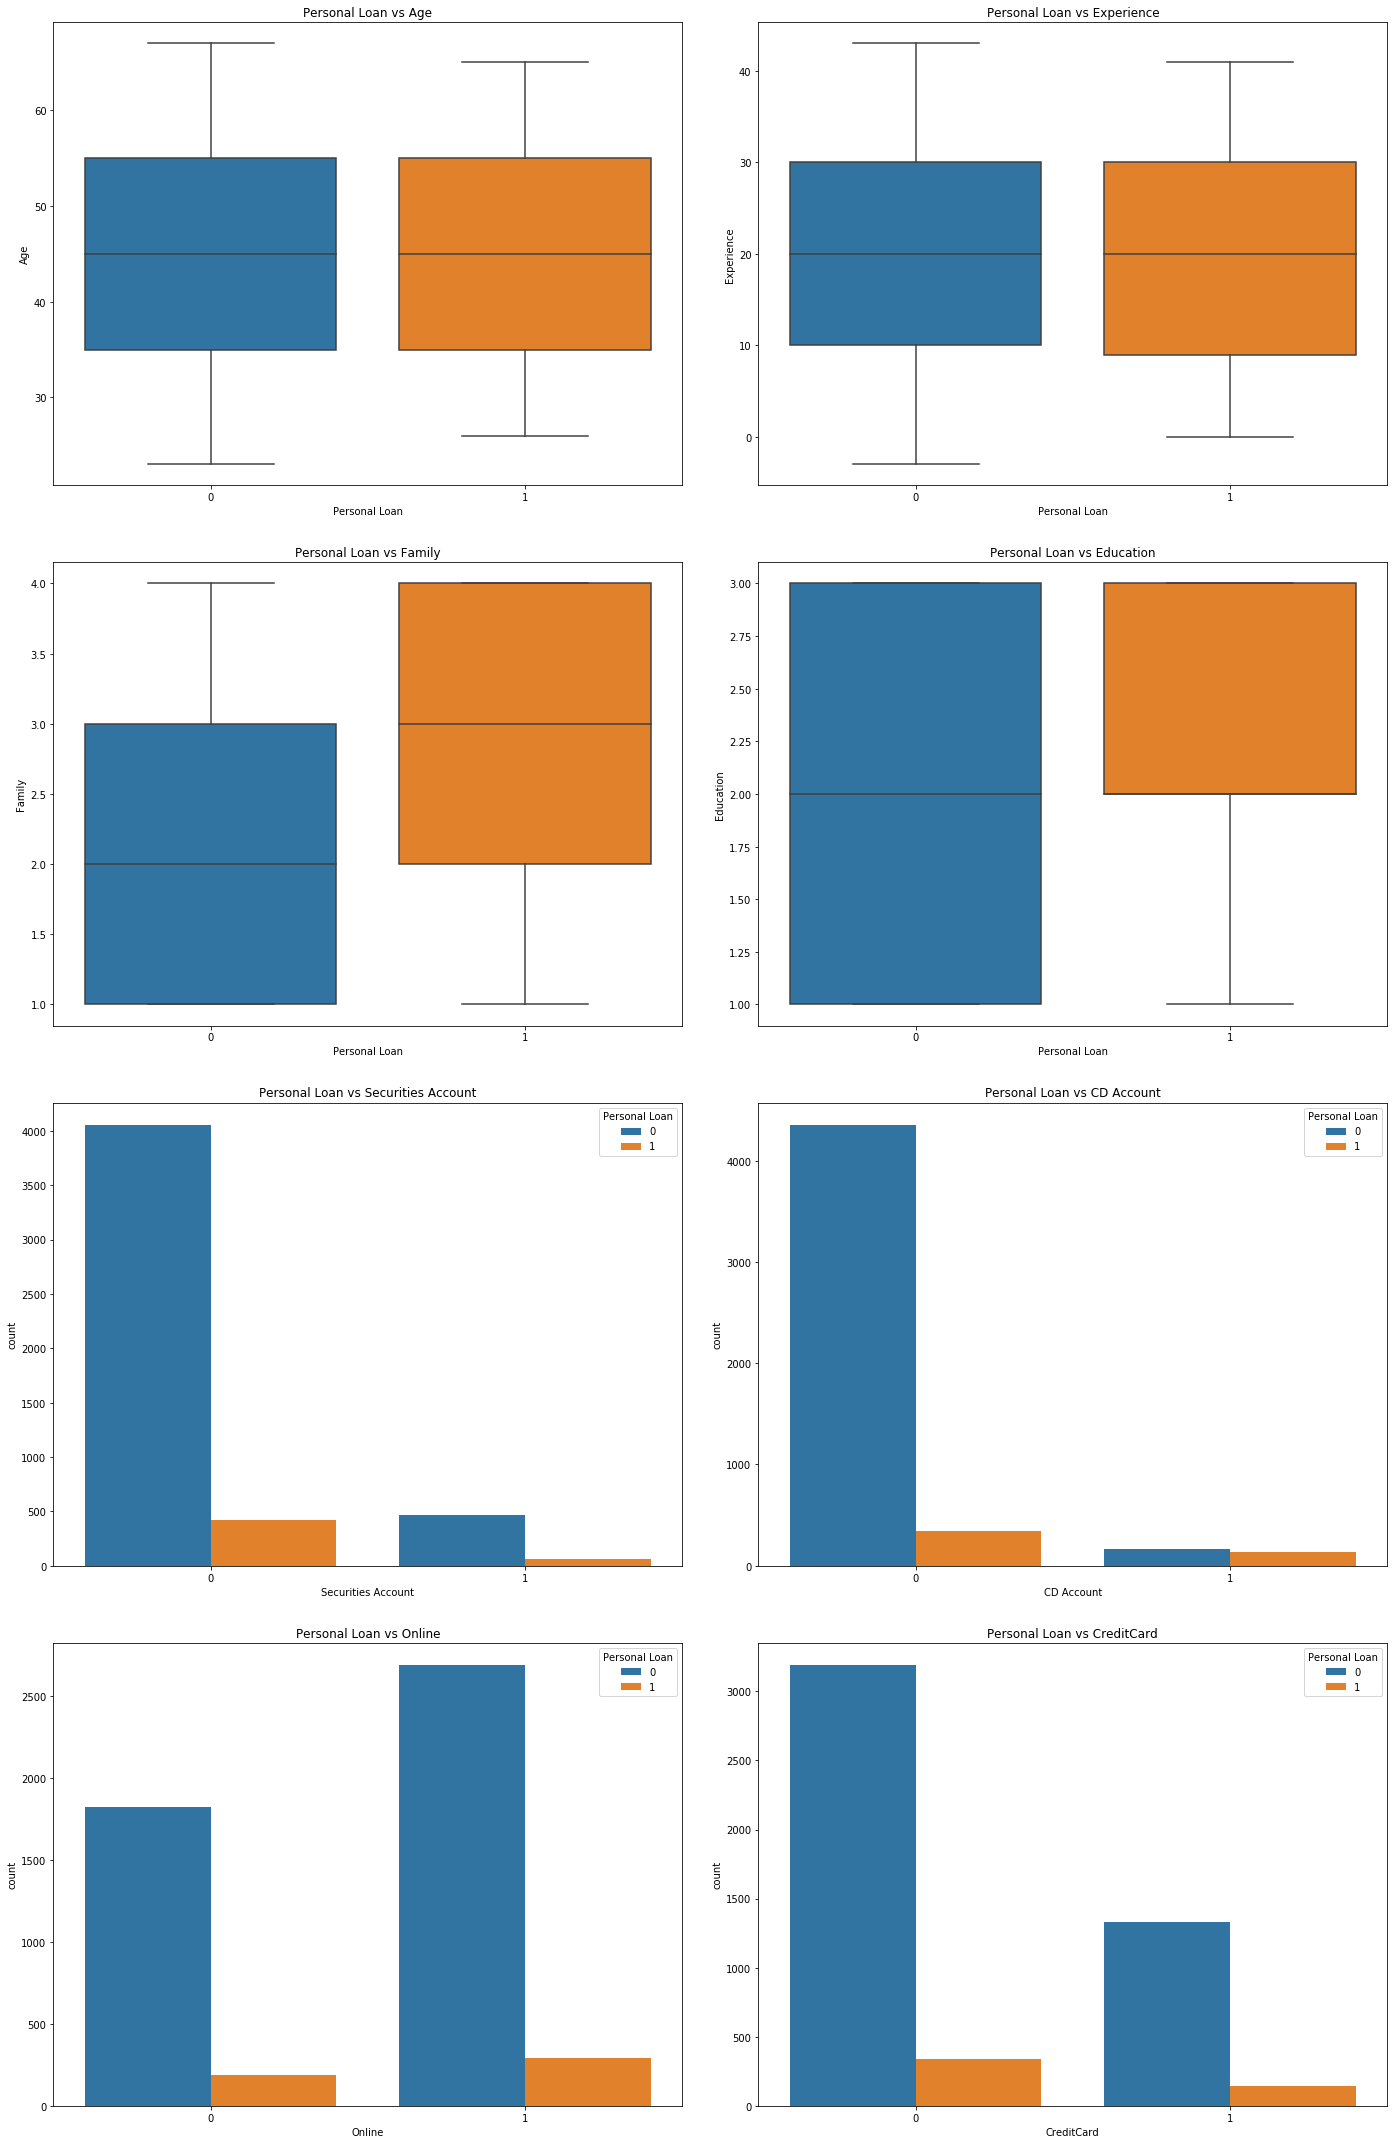

In [95]:
plt.figure(figsize= (20,60)) # To set the plot size.

plt.subplot(8,2,1)        # Here subplot function is used to arrange the plots one-by-one and two plots in one row.
sns.boxplot(data1['Personal Loan'],data1['Age']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('Personal Loan vs Age') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots. 

plt.subplot(8,2,2)
sns.boxplot(data1['Personal Loan'],data1['Experience']) #This function gives the countplot for label attribute with respect to feature with continuous variable.
plt.title('Personal Loan vs Experience')
plt.tight_layout(pad=3.0)

plt.subplot(8,2,3)
sns.boxplot(data1['Personal Loan'],data1['Family']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('Personal Loan vs Family')
plt.tight_layout(pad=3.0)

plt.subplot(8,2,4)
sns.boxplot(data1['Personal Loan'],data1['Education']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('Personal Loan vs Education')
plt.tight_layout(pad=3.0)

plt.subplot(8,2,5)
sns.countplot(data1['Securities Account'], hue=data1['Personal Loan'],) # To see the distribution of the categorical varable.
plt.title('Personal Loan vs Securities Account')
plt.tight_layout(pad=3.0)

plt.subplot(8,2,6)
sns.countplot(data1['CD Account'], hue=data1['Personal Loan']) # To see the distribution of the categorical varable.
plt.title('Personal Loan vs CD Account')
plt.tight_layout(pad=3.0)

plt.subplot(8,2,7)
sns.countplot(data1['Online'], hue=data1['Personal Loan']) # To see the distribution of the categorical varable.
plt.title('Personal Loan vs Online')
plt.tight_layout(pad=3.0)

plt.subplot(8,2,8)
sns.countplot(data1['CreditCard'], hue=data1['Personal Loan']) # To see the distribution of the categorical varable.
plt.title('Personal Loan vs CreditCard')
plt.tight_layout(pad=3.0)

#### Combined Inference for the above plot: 

###### 1. Personal Loan vs Age:
    Age Group of the people who mostly accepted the loan and did not accept loan seems to be similar.
    
###### 2. Personal Loan vs Experience:
    People who have mostly accepted and did not accept the loan have similar years of experience.
    
###### 3. Personal Loan vs Family:
       1. Most of the family with memebers less than and equal to three did not mostly accept the loan but there are also many instance where most of the family with more than two and less than four members have accepted the loan.
       2. Few families having less than two members also have accepte the loan and few families with more than two members also have not accepted the loan 

###### 4. Personal Loan vs Education:
    There are instances were prople of all levels of education have not accepted loan but the graph says there are also instances were people with level of education more than Graduate and advanced have also accepted the loan but based on education no.of people accepted the loan is small. There is large variation between the classes.

###### 5. Personal Loan vs Securities Account:
       1. People with security account are comparitively smaller than the people who do not have the security accoynt.
       2. People whodo not have securities account has largely accepted the loan than people who do not have securities account.

###### 6. Personal Loan vs CD Account:
       1. People with CD Account are comparitively smaller than the people who do not have the CD Account.
       2. People who do not have CD Account as largely accepted the loan than people who do not have CD Account.

###### 7. Personal Loan vs Online:
       1. People with online option are comparitively larger than the people who do not have the online option.
       2. People who have online option largely accepted the loan than the people who do not have the online option.

###### 8. Personal Loan vs CreditCard:
       1. People without Credit card are comparitively larger than the people who do not have the Credit Card.
       2. People who do not have Credit card largely accepted the loan than the people who have the Credit card.


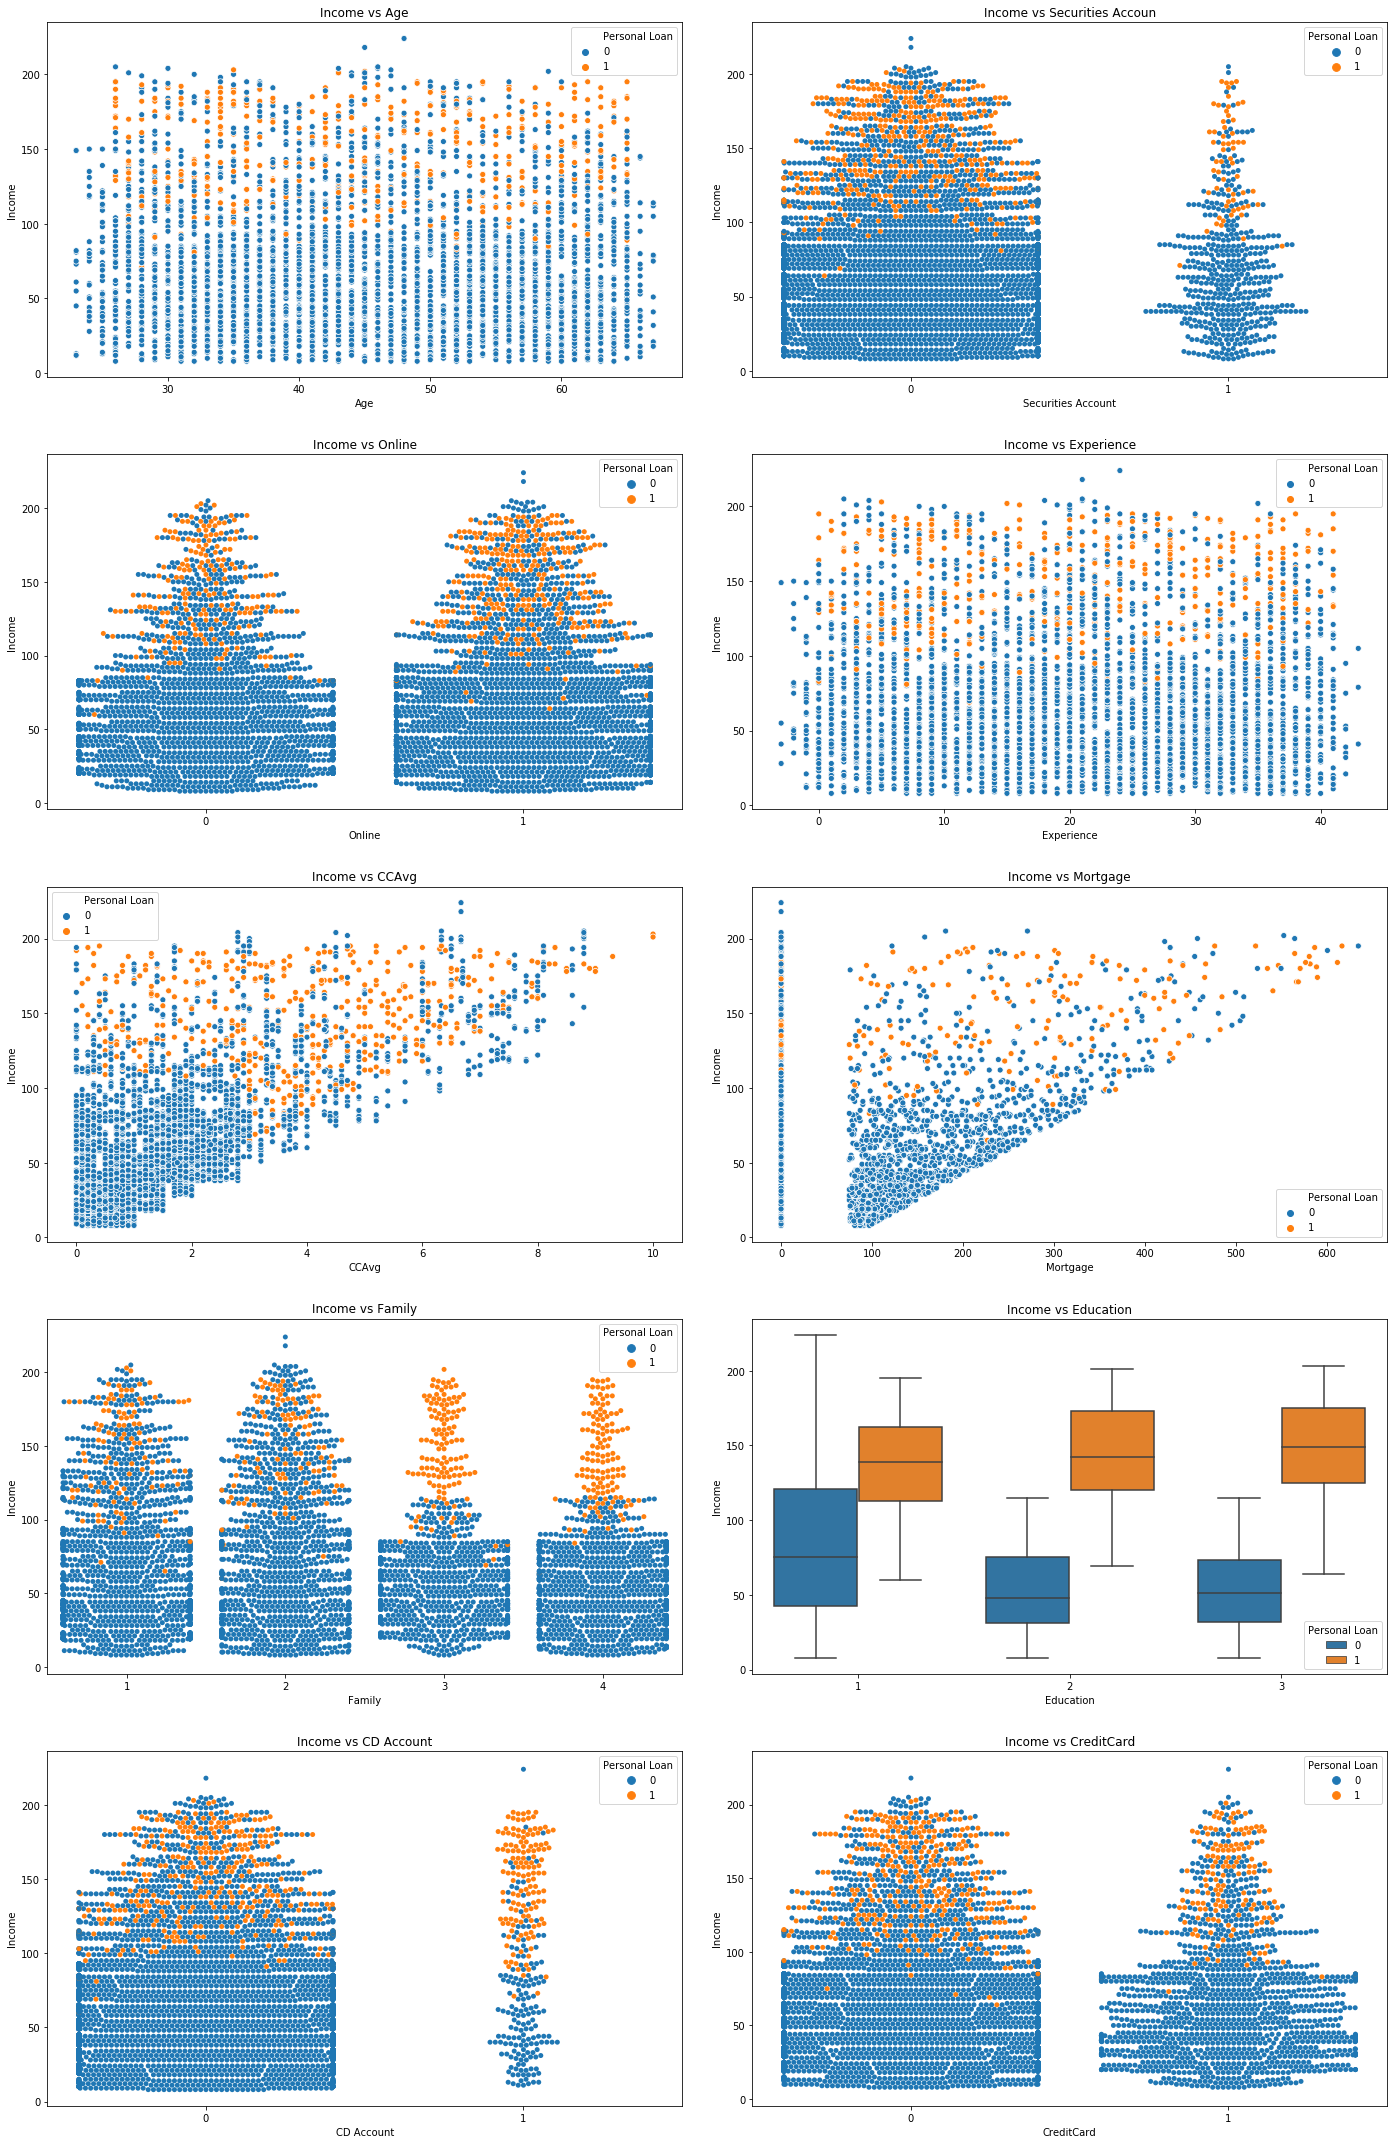

In [62]:
plt.figure(figsize= (20,60)) # To set the plot size.

plt.subplot(10,2,1) 
sns.scatterplot(data1['Age'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs Age')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,2) 
sns.swarmplot(data1['Securities Account'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs Securities Accoun')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,3) 
sns.swarmplot(data1['Online'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs Online')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,4) 
sns.scatterplot(data1['Experience'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs Experience')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,5) 
sns.scatterplot(data1['CCAvg'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs CCAvg')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,6) 
sns.scatterplot(data1['Mortgage'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs Mortgage')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,7) 
sns.swarmplot(data1['Family'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs Family')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,8) 
sns.boxplot(data1['Education'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs Education')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,9)
sns.swarmplot(data1['CD Account'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs CD Account')
plt.tight_layout(pad=3.0)

plt.subplot(10,2,10)
sns.swarmplot(data1['CreditCard'],data1['Income'],hue=data1['Personal Loan'])
plt.title('Income vs CreditCard')
plt.tight_layout(pad=3.0)



#### Combined Inference for the above plot: 
 Income being one of the most important feature for this case the above plots were ploted to have general visualization. From the above plot it can be understood that people who have accepted the loan (9.6%) have their income greater than 100,000 dollars which is evident from above plots.

#### Categorical Variable vs Numerical Variables

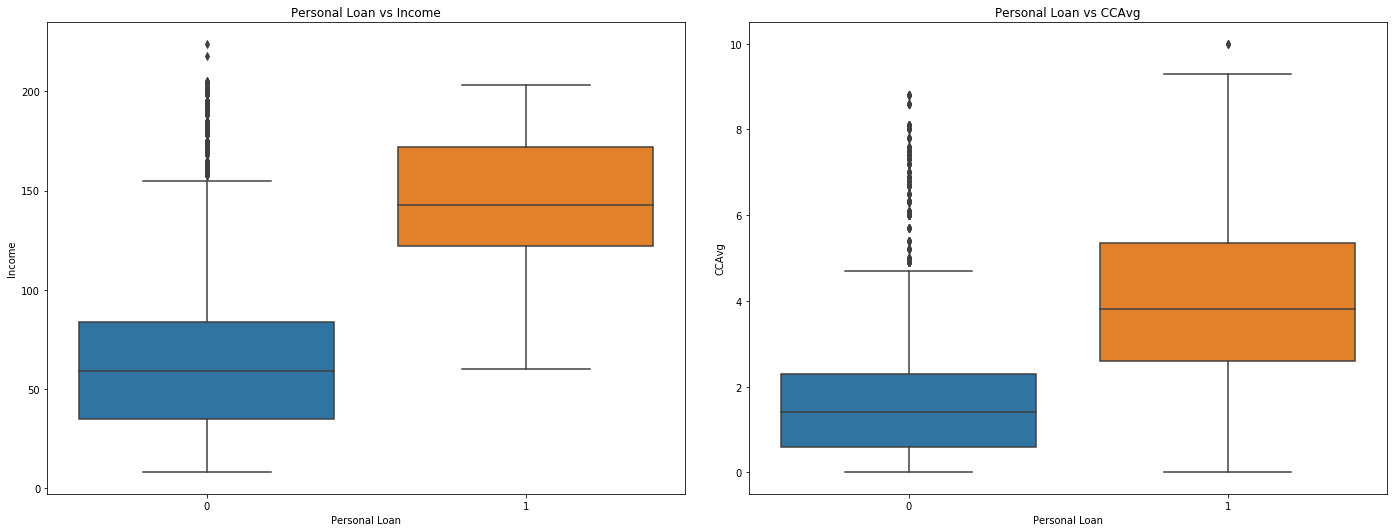

In [76]:
plt.figure(figsize= (20,15)) # To set the plot size.

plt.subplot(2,2,1)        # Here subplot function is used to arrange the plots one-by-one and two plots in one row.
sns.boxplot(data1['Personal Loan'], data1['Income']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('Personal Loan vs Income') #To plot the graph with the title of the page.
plt.tight_layout(pad=3.0) #To leave space between the plots.

plt.subplot(2,2,2)  
sns.boxplot(data1['Personal Loan'], data1['CCAvg']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.
plt.title('Personal Loan vs CCAvg')
plt.tight_layout(pad=3.0)

#### Inference on the above output:

##### 1. Personal Loan vs Income:
            People who have mostly accepted the loan have income more than 50,000 dollars but there are few people who have are with more than 50,000 dollars have also not accepted the loan. It would be fine if the campign targets the people with income more than 100,000 dollars to achieve goog conversion rate. 

##### 1. Personal Loan vs CCAvg:
          Most of the people who have accepted the loan have Avg. spending on credit cards per month more than 2000 dollars.

### Multivariate Analysis

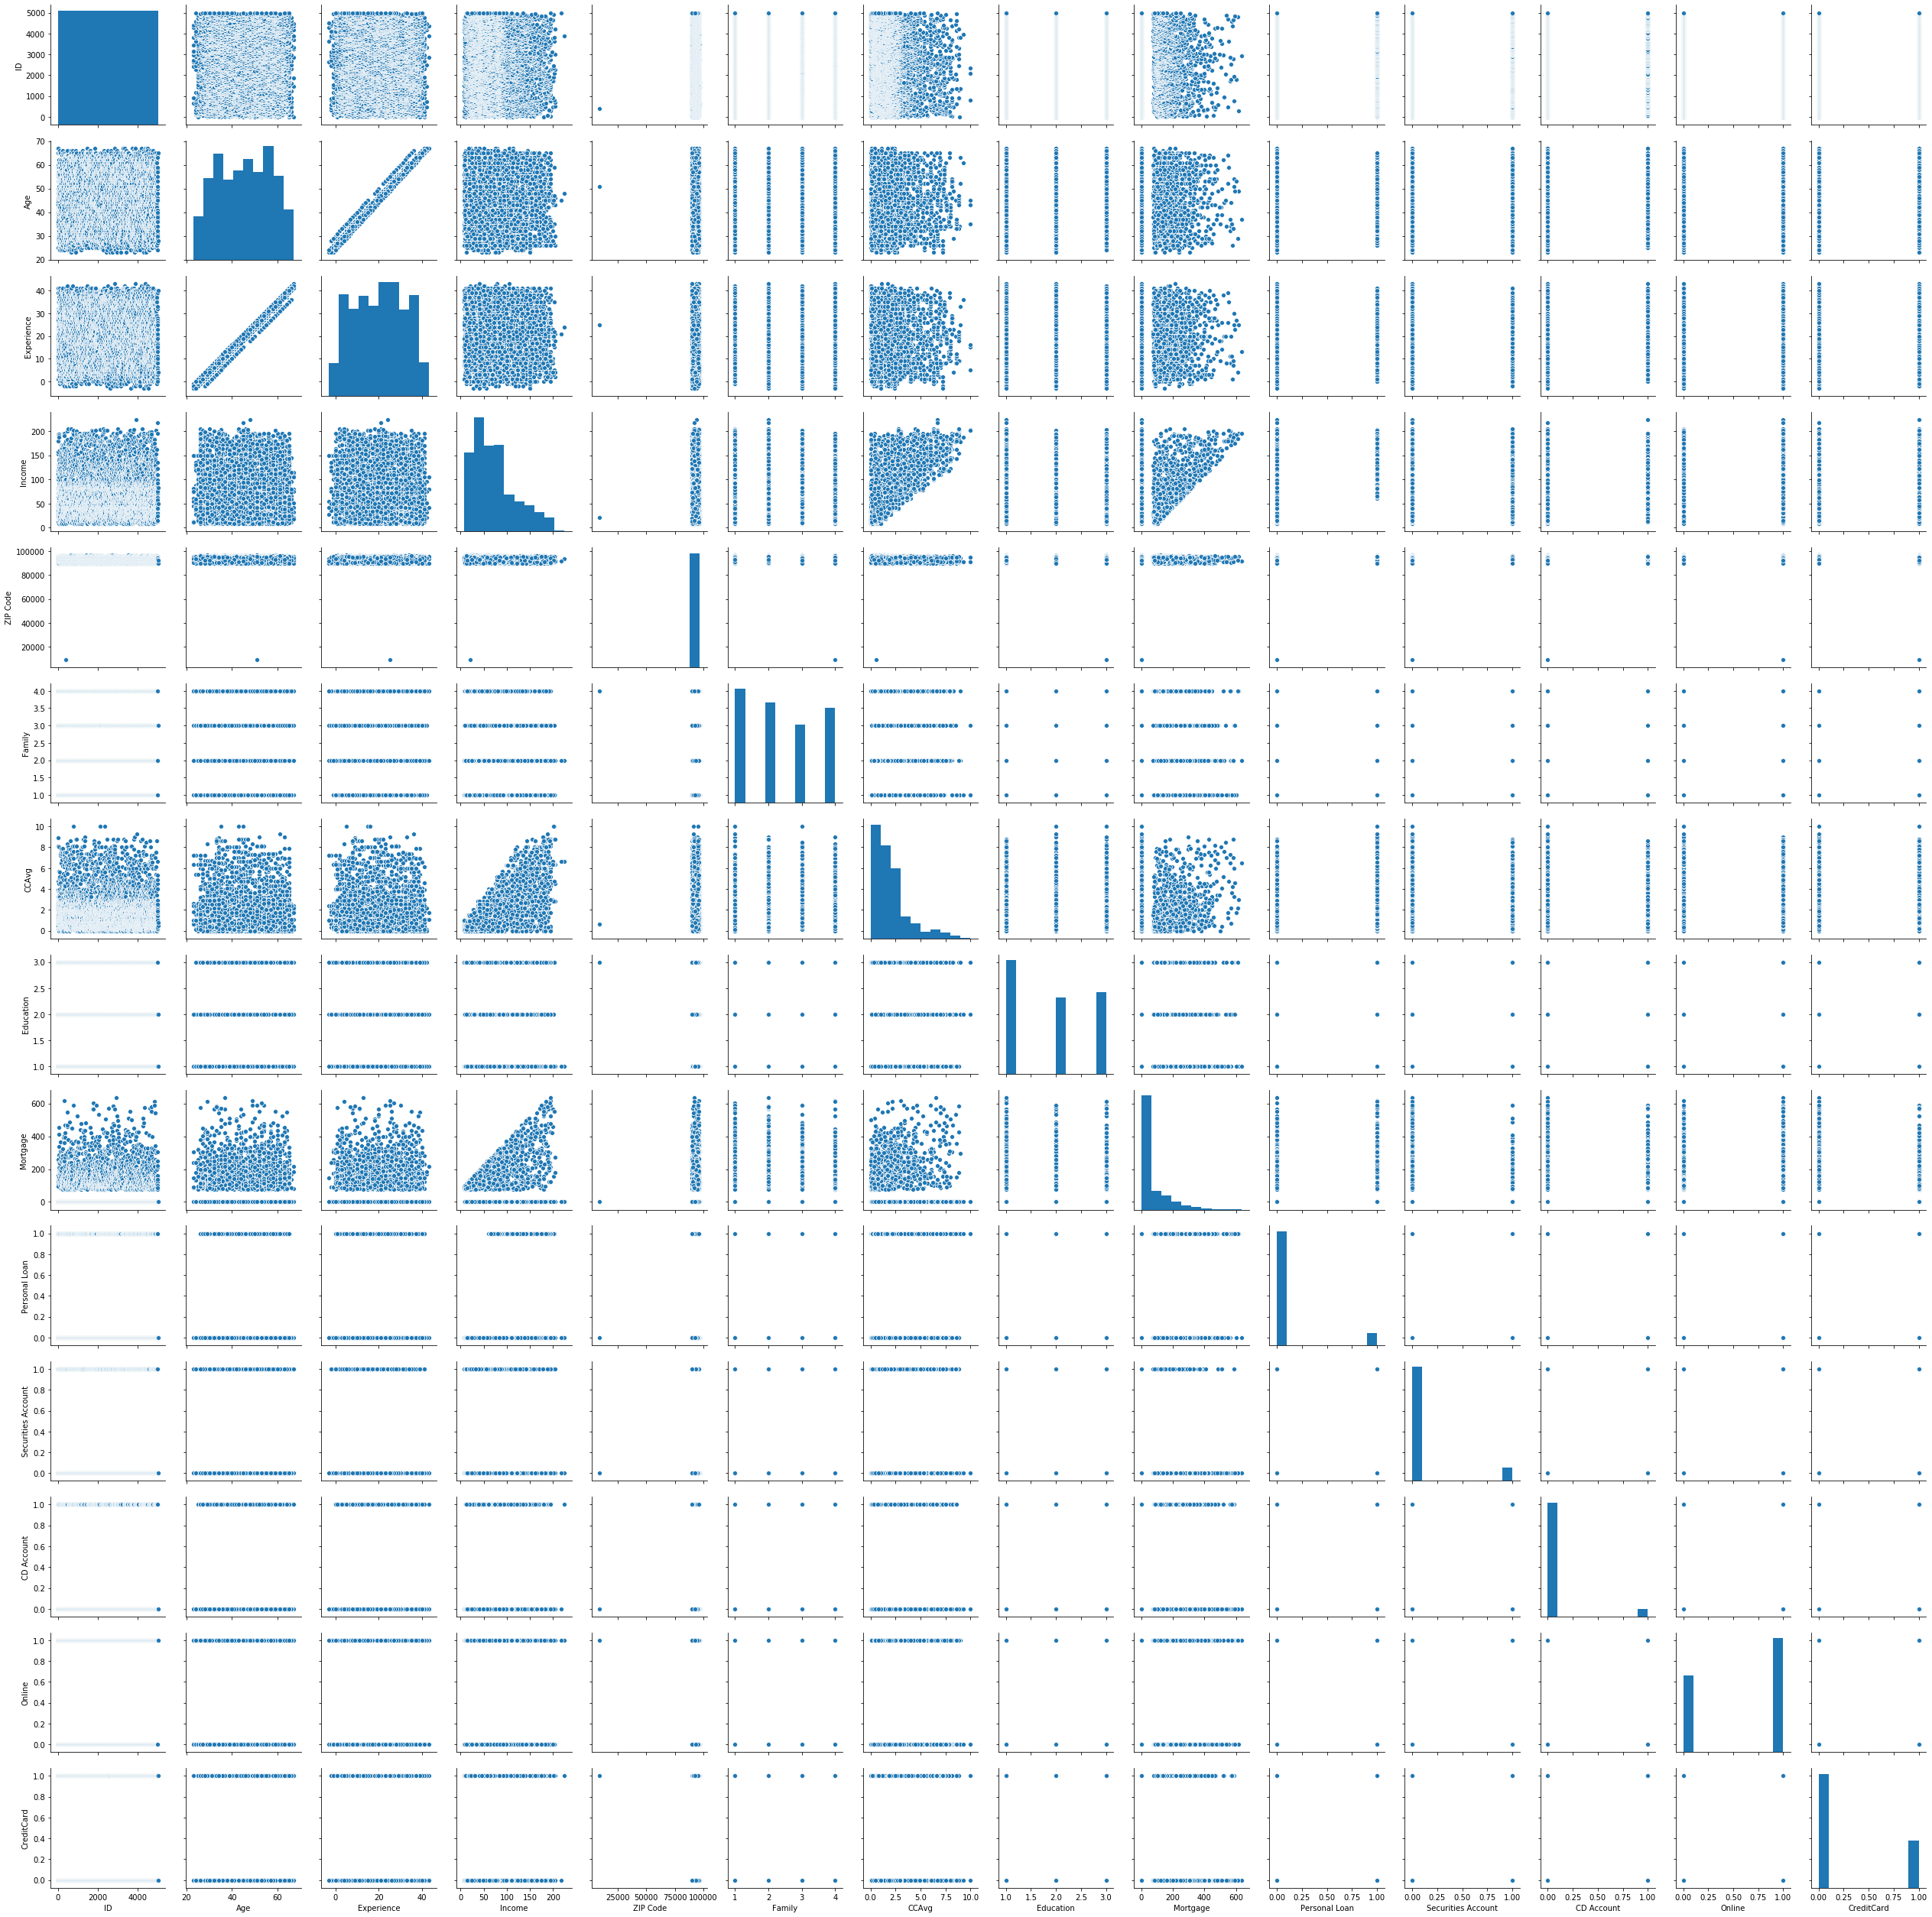

In [77]:
sns.pairplot(data1) #Paitplot for all the columns is displayed using pairplot function from seaborn package. 

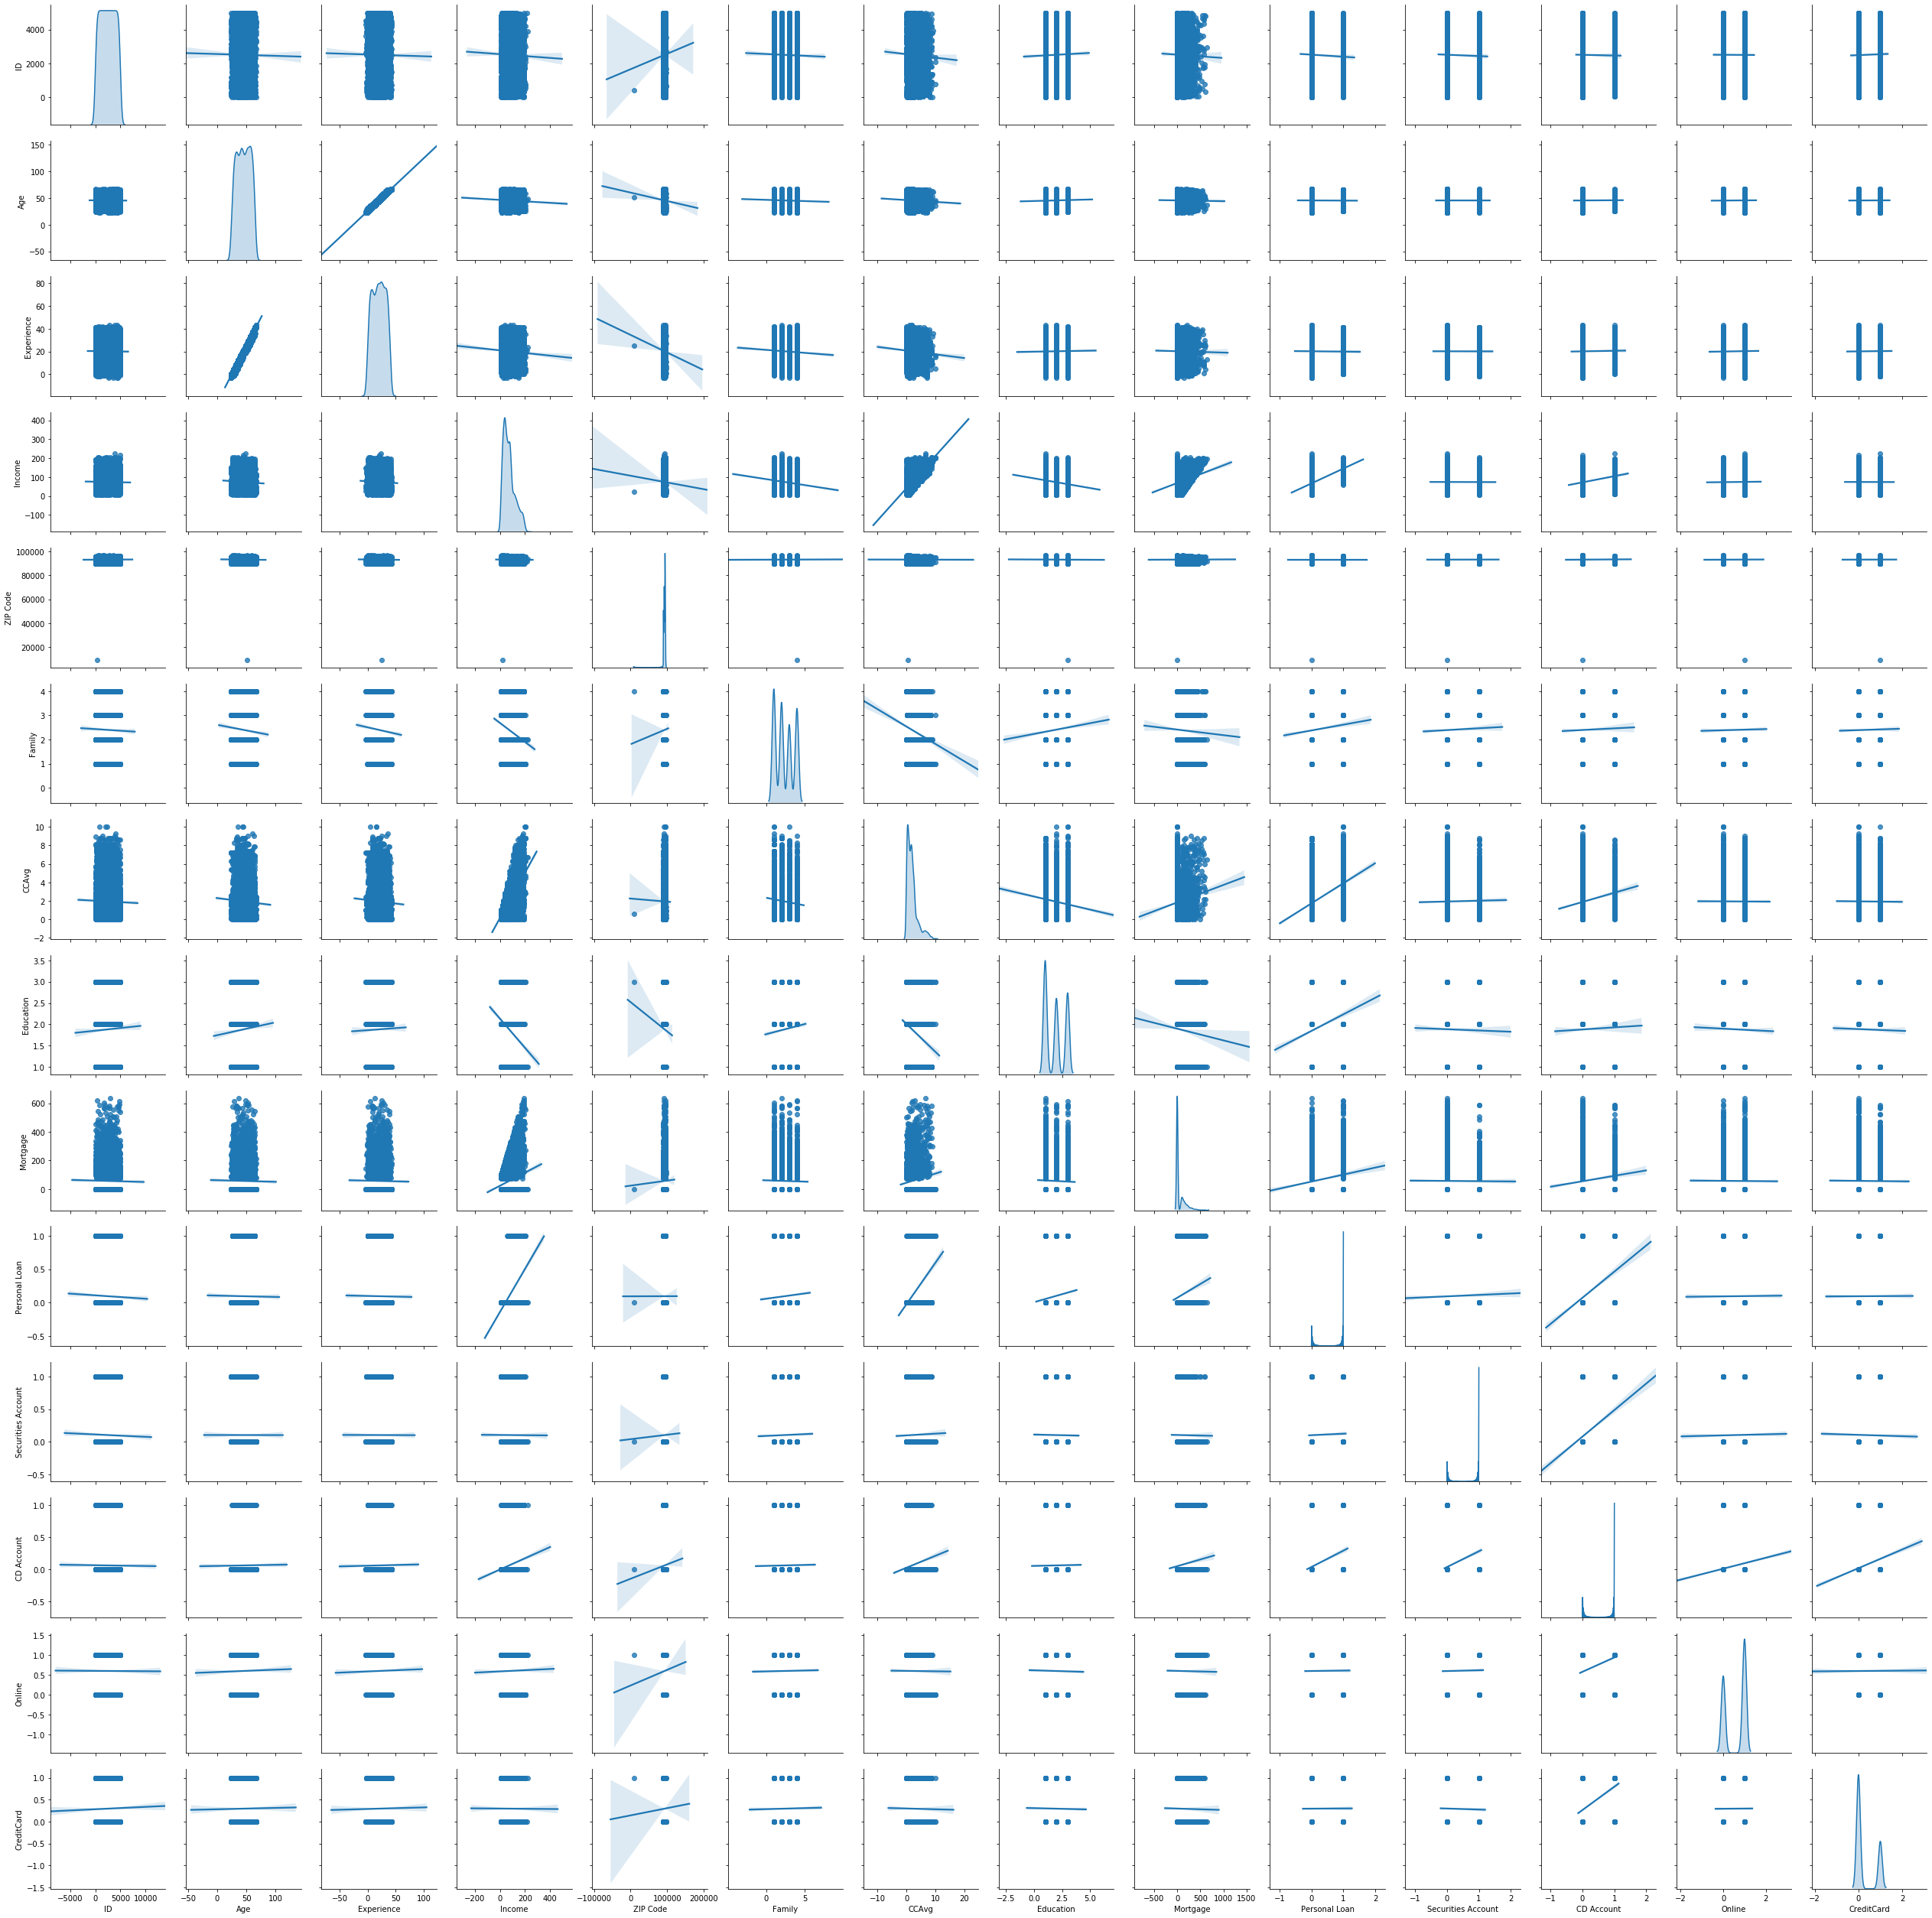

In [78]:
sns.pairplot(data1, kind='reg',diag_kind = 'kde')  #Paitplot for all the columns is displayed using pairplot function from seaborn package.

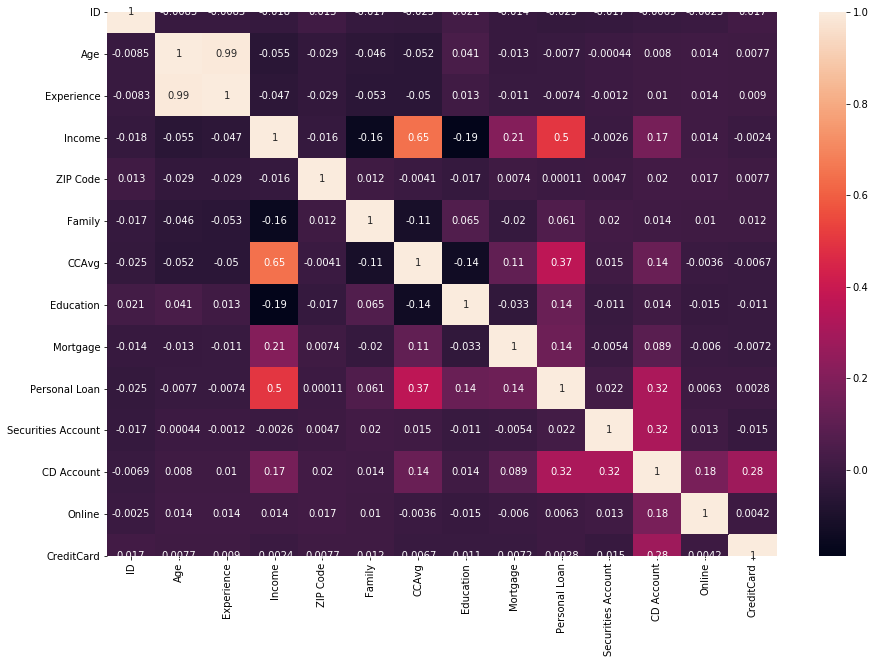

In [79]:
corr=data1.corr() #This function gives the correlation between the features.
plt.subplots(figsize =(15, 10)) # Here subplot function is used to give the shape of the each box in the heatmap.
sns.heatmap(corr,annot=True) #Using this function we can have the visualization of the correlation between the features.

##### Inference on above outputs:
1. Age and Experience are found to have high correlation.


=========================================================================================================================

# Data Preprocessing:

 Data Preprocessing involves:
 1. Data Imputation (Step:1).
 2. Outlier Detection and Cleaning Process (Step:4).
 

 Additional steps were also underwent, they are:
 
  1. Dealing with Categorical columns with One-Hot Encoder (Step:2).
  2. Converting irrelevant negative values of features into relevant values (Step:3).

#### Step 1: Checking for the presence of null values:

In [82]:
data1.isnull().values.any() #Detects missing values and if any missing value is present it gives the output as True or else False.

False

##### Inference on the above ouput:
   There are no missing values in the data.

#### Step 2: Creating Dummy Variables for the Categorical columns (One - Hot Encoding):
       In the given data features like Family and Education belong to the categorical columns in which their current nature (Numerical Categorical Data) of data type is not suppotrful in upcoming algorithms for classification and prediction.        Therefore, each categories in those columns are converted into Binary Vectors using One-Hot Encoder. 

In [6]:
data1_2 = pd.get_dummies(data1, columns = ['Family', 'Education']) #This function executes the one-hot encoder procedure and creates binary features for categorical variables.

data1_2.iloc[:,12:] #To display the newly creates feaures using the one-hot encoder.

Family_1  Family_2  Family_3  Family_4  Education_1  Education_2  \
0            0         0         0         1            1            0   
1            0         0         1         0            1            0   
2            1         0         0         0            1            0   
3            1         0         0         0            0            1   
4            0         0         0         1            0            1   
...        ...       ...       ...       ...          ...          ...   
4995         1         0         0         0            0            0   
4996         0         0         0         1            1            0   
4997         0         1         0         0            0            0   
4998         0         0         1         0            0            1   
4999         0         0         1         0            1            0   

      Education_3  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
4995            1  
4996            0  
4997            1  
4998            0  
4999            0  

[5000 rows x 7 columns]

##### Inference on the above ouput:
   Numerical categorical columns are converted into Binary vectors with respect to their major category. Normally after doing One-Hot encoder any one of the newly created binary vector can be removed but here its not done because assuming that all the features are important further steps are proceeded.

#### Step 3: Converting all the neagative experience values to zero:
  The Experience feature in the data set contains the number of years of experience in negative values which is not possible so they are made to zero but in future this feature will be dropped because of high correlation with attribute age.

In [7]:
data1_2[data1_2['Experience']<0] = 0 #Replacing all negative experience as zero.
(data1_2<0).any() #Checking the presence of unnecessary neagative value.

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
CCAvg                 False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
Family_1              False
Family_2              False
Family_3              False
Family_4              False
Education_1           False
Education_2           False
Education_3           False
dtype: bool

##### Inference on the above ouput:
  In the above cell all the negative values of experience were converted into zero and was also checked whether any feature caontains irrelevantly negative values.

#### Step 4: Outlier Detection and Elemination:
  Outliers can be detected in the following methods:
  
  1. Visualization Techniques:
       
       a. Box Plot.
       
       b. Scatter Plot.
       
       
  2. Non - Visualization Techniques:
      
      a. Z-score
      
      b. IQR.

Outlier elemination methods:
 
  1. Z-Score.
  2. IQR

#### a.: Outlier Detection:
    In our data the outliers are detected for features of continuous and few categorical variables like Age, Experience, family and Education data type.

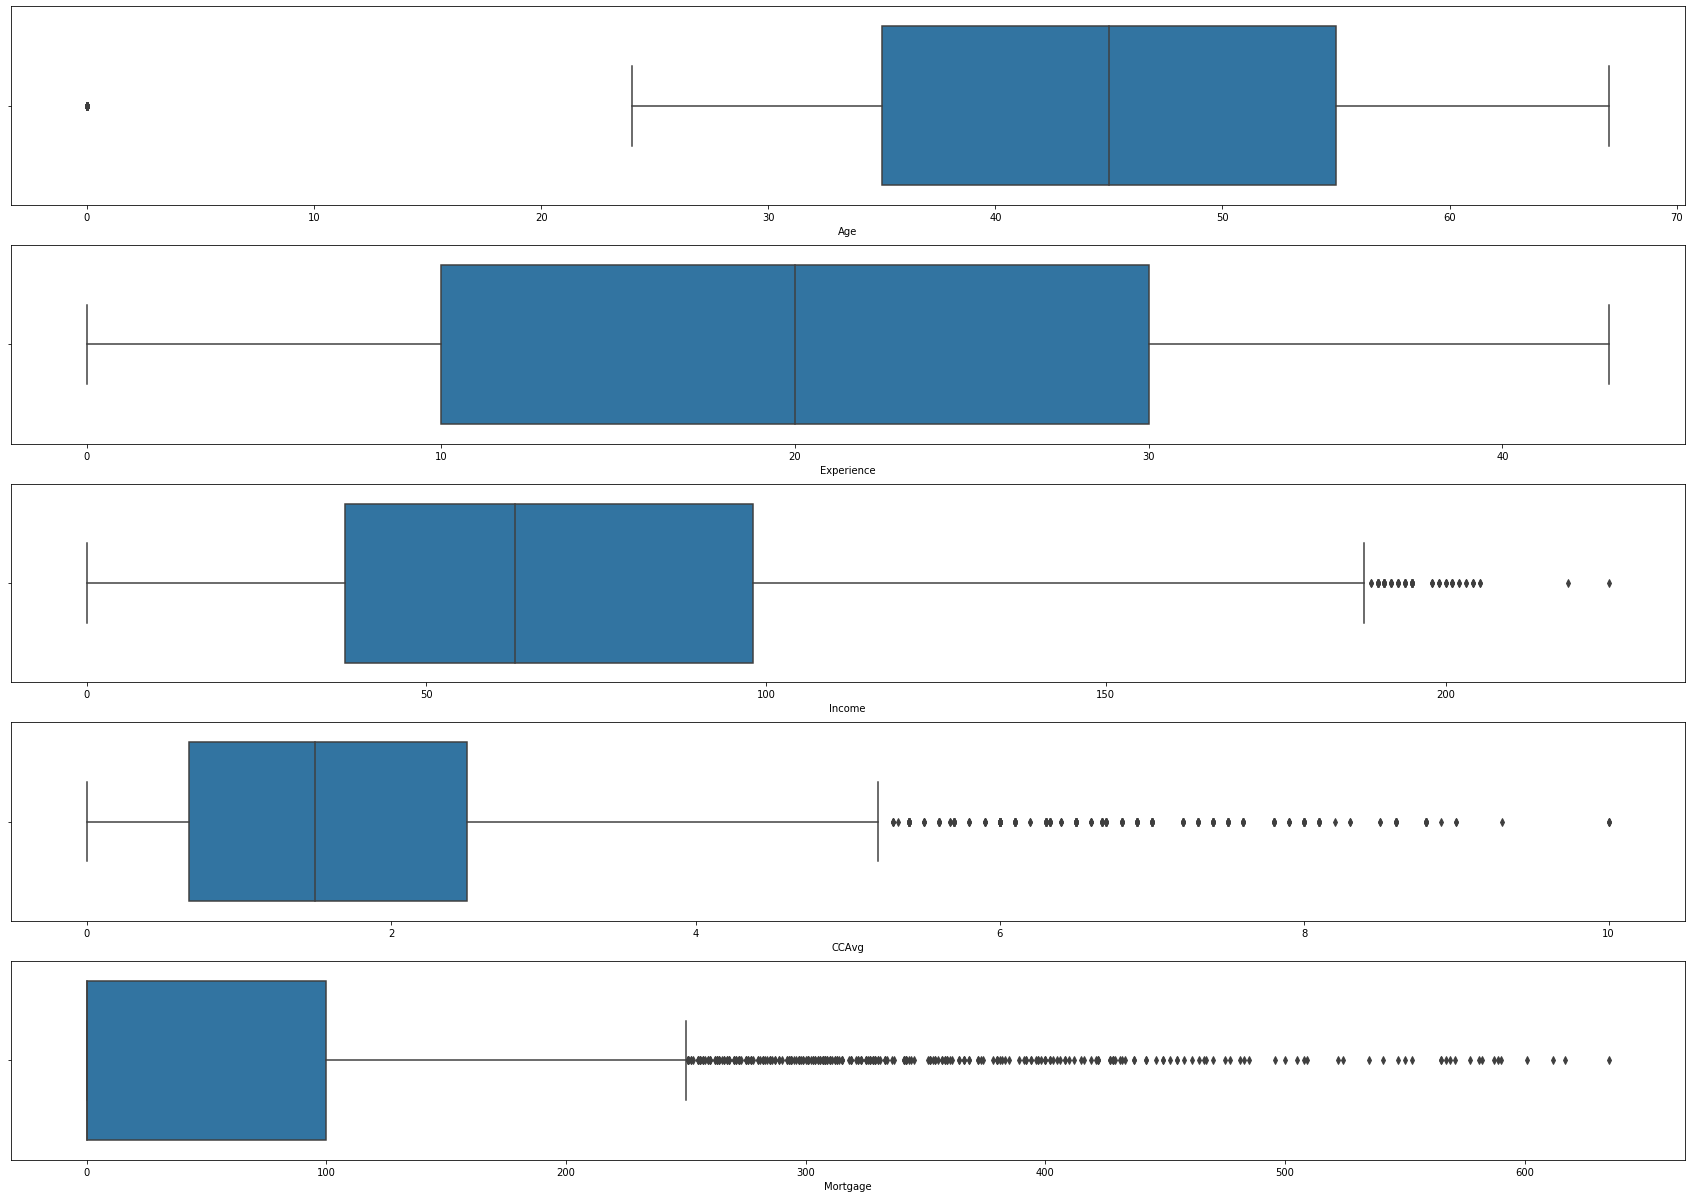

In [85]:
plt.figure(figsize= (30,30)) # To set the plot size.

plt.subplot(7,1,1)        # Here subplot function is used to arrange the plots one-by-one.
sns.boxplot(data1_2['Age']) # This function creates boxplot as shown below to visualize the distribution of a data also gives visualization on the presence of outliers and five point summary.

plt.subplot(7,1,2)
sns.boxplot(data1_2['Experience'])

plt.subplot(7,1,3)
sns.boxplot(data1_2['Income'])

plt.subplot(7,1,4)
sns.boxplot(data1_2['CCAvg'])

plt.subplot(7,1,5)
sns.boxplot(data1_2['Mortgage'])

##### Inference on the above steps:
1. Outliers in Mortgage > CCAvg > Income.

##### Note:
1. Here, no outlier treatment is done because from above observation it can be noted that outliers are in positive side.
2. If any outlier capable of accepting loan it is an advantage.


==================================================================================================================

## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

# Data Splitting:

#### Step 1: Seperating the data into Predictors and Labels:
1. x is for predictors.
2. y is label with class output.

In [8]:
x = data1_2.drop(['Personal Loan'], axis=1)
y = data1_2['Personal Loan']

#### Step 2:Splitting the predictors and targets into training and testing data:
   Here we split the labels and feature into training (for training the model) and testing (for testing the model's predictability) samples in the 70:30 ratio.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3,random_state=1)

##### Inference on the above steps:
  The data is seperated into label and feature and again split into train and test samples with 70:30 proportions respectively, so now we can train and test the model. 

##### Note before getting into model building :

1. MultiCollinearity check is not done here for our features based on the theoretical statement that "Multicollinearity is a problem for Linear models and also for Log and Cox regression if the predictors have very high correlation". In our case Predictors dont have the very high correlation other than the following features:

    1. Age and Experince with high correlation, so feature - experience was dropped in the following process
    

2. The features Age and Experience are in years. Income, CCAvg and Mortgage are in dollars. 

3. But Scaler or normalization of those features where not done because classifiers are not affected by different scales of the features. 

4. It was also found pracrically that applying Scaler or normalization got the same score values for Logistics. These try out are not shown here.

5. Also KNN algo was affected, found when plotting the graph ( Odd K value vs Misclassifcation error) for finding the best K value.

6. It can also be said that Gaussian Naive Baye's standardization by itself because of its Gaussian nature so not necessary to do the Normalization seperately.

7. Also, as there is no domain knowledge unnecessarily features are not dropped.

=====================================================================================================================

## 4. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks):

# Building Classification model using different algorithms:


## a. Logistic Regression:

###  Business Objective Based Model:
    To help the bank to convert their liabitlity customers to personal loan customers by hosting campigns with target marketing to increase the conversion ratio. Therefore, here we use Logistic regression, so that using the past data we create a Logistic regression classifier model that will classify customers based on the best threshold vlaue such that we can correctly target the customer and improve the converstion rate. Given attributes (demographic and customer's relationship with the bank) as input to the model it will give class output with probablity whether the cutomer will accept the loan or not based on which we can do target marketting.

Based on the Note mentioned above, features like ID (just a number), ZIP Code (just a number) and Experience are removed for our further process

#### Dropping ID and Experience features:

In [14]:
x_train_1 = x_train.drop(['ID','Experience','ZIP Code'],axis=1) #Preparing the training features for cross validation.
x_test_1 = x_test.drop(['ID','Experience','ZIP Code'],axis=1)   #Preparing the testing features for cross validation.

##### Inference on the above ouputs:
  x_test_1 and x_train_1 have features without ID ,ZIP Code and Experience.

####  Step 1a: Model buliding using scikit-learn:


  The Logistic Regression model can also be built using the LogisticRegression module available in the Scikit-Learn. x_train used here is from the above results where multicollinearity is eleminated.

In [15]:
# Fitting the model 
model = LogisticRegression(solver="liblinear") # making use of the inbuilt function of sklearn to build the logistic regression.
model.fit(x_train_1, y_train) # Fitting the training data into the model.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

##### Inference on the above ouputs:
  In the above cell, model (logit function - Sigmoid Curve) was built using the LogisticRegression function in the sklearn package and the model was trained using training data.

####  Step 1b: Extracting the coefficients:

In [20]:
#Getting the Coefficients and intercept of the Log Reg model
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.012302  0.053984  0.203578  0.000747 -0.773474  2.993044 -0.556537   

          7         8         9        10        11        12        13  \
0 -0.806052 -2.009509 -1.981833  0.084197 -0.595503 -3.820238 -0.459187   

         14  intercept  
0 -0.223223    -5.0801  


##### Inference on the above output:

   The coefficients can be used to determine the important features and tune the model further but above coefficients are in the exponential terms so they have to be converted to determine important features. Also as there is no domain knowledge to drop important features, further process is carried out without dropping any feature by assuming all the features are important.

#### Step 3: Performance of our model with training data:

In [296]:
y_predict_training_LR = model.predict(x_train_1) # predicting the class outputs using the training data of features. 
print("Model Accuracy: {0:.4f}".format(model.score(x_train_1, y_train))) #Measuring the accuraccy score of the model.

Model Accuracy: 0.9617


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 96.17% accuracy, which is measureed by comparing actual and predicted output (predicted using the model). 

#### Step 4: Performance of our model with testing data:

In [297]:
y_predict_testing_LR = model.predict(x_test_1) # predicting the class outputs using the testing data of features.
print("Model Accuracy: {0:.4f}".format(model.score(x_test_1, y_test))) #Measuring the accuraccy score of the model.

Model Accuracy: 0.9553


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the testing data upto 90.07% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data.
  This kind of performance may be due to:
  1. Imbalance in the data.
  2. Moderate correlation between the features.
  3. Due to the presence of the outliers (reason for not performing outlier treatment is said above).  

## b. KNN - Classifier:

### Business Objective Based Model:
   To help the bank to convert their liabitlity customers to personal loan customers by hosting campigns with target marketing to increase the conversion ratio. Therefore, here we use K Nearest Neighbours, so that using the past data we create a KNN model that will classify customers based on the majority of vote from K nearest neighbours such that we can correctly target the customer and improve the converstion rate. Given attributes (demographic and customer's relationship with the bank) of the customer as input to the KNN model it will give class output as whether the cutomer will accept the loan (Class 1) or not (Class 0) based on which we can do target marketting.

##### Till Model Building all the steps are same so we can use the output of following steps from the Logistic Regression:
1. Step 1: Checking for the presence of null values
2. Step 2: Creating Dummy Variables for the Categorical columns (One - Hot Encoding)
3. Step 3: Converting all the neagative experience values to zero:
4. Step 4: Standardizing the units of all the feature with different units
5. Data Splitting. - From which y_train and y_test are used
6. Multicollinearty Removal - From this x_train3 and x_test3 are used because they don't contain collinear attributes.

KNN algoritham works as follows:
1. Creates clssification of labels for their respective features using the training data.
2. Gets a query point as input.
3. Measures distance of the query point with all other data points.
4. Arranges the distance values in the ascening order.
5. Based on K value given in the model it take out the first K distance values arranged in ascending order.
6. In the first K distance value the algoritham looks for the presence of the majority class and the query point is classified to the majority class.

Note:
 In case the distance value is same with the K nearest points to break this tie, it is recommended to use the K value as odd numbers.

#### Step1: Creating odd list of K for KNN:
  It is important to have odd values of K for binary classification because if the distance values of two classes are same, to break this tie if we have odd value of K we can break the tie.

In [222]:
mylist = list(range(1,20)) #Creating list of values from 1 to 20.
kneigh = list(filter(lambda x: x % 2 != 0, mylist)) #Extracting odd values form the above values.
kneigh

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

##### Inference of the above output:
  We have created odd values of K in the range of 1 to 20

#### Step 2: Building the model using KNN algorithms:

In [326]:
ac_scores = [] #Creating empty list to store the accuracy scores that we are about to obtain.

for k in kneigh:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance') #Constructing the model using the inbuilt function of K nearest neighbors in sklearn package.
    knn.fit(x_train_1, y_train) #Trining the model using the training data.
    
    y_pred = knn.predict(x_test_1)# predicting the class output
    
    scores = accuracy_score(y_test, y_pred) #evaluating the accuracy score.
    ac_scores.append(scores) #Storing the accuracy scores to the above crated list
  
 #Creating the dataframe of accuracy scores and missclassification for various K values.
a = pd.DataFrame((ac_scores),columns = ['Accuracy Scores']) 
MSE = [1 - x for x in ac_scores]
 
a['MisClassification Error'] = MSE
a['K value'] = kneigh
a

Accuracy Scores  MisClassification Error  K value
0         0.903333                 0.096667        1
1         0.906667                 0.093333        3
2         0.902667                 0.097333        5
3         0.902667                 0.097333        7
4         0.906000                 0.094000        9
5         0.906667                 0.093333       11
6         0.903333                 0.096667       13
7         0.904000                 0.096000       15
8         0.904667                 0.095333       17
9         0.904000                 0.096000       19

##### Inference on the above output:
   We have created the model and built a dataframe that consist of Accuracy scores, MisClassification error for odd K values using the model built from KNN algorithm. 

#### Step 3: Deciding the optimal K value: 

optimal_k vlaues: Series([], Name: K value, dtype: int64)


Text(0, 0.5, 'Misclassification Error')

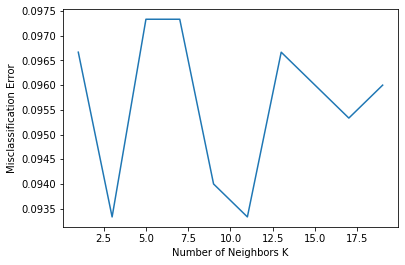

In [295]:
# determining best k value by ploting the K value vs misclassification error.
optimal_k = kneigh[MSE.index(min(MSE))]

plt.plot(kneigh, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

##### Inference on the above output:
  From the above graph and DataFrame in previous step it can be found that the K value of 3 and 11 have very less missclassificaion error of 0.09333 which is comparitively less. For final model construction K value of 11 can be used because having 11 compared to 3 makes use of more nearest neighbours which might improve the process of classification. The dataframe in the step 2 also shows that the when k is 3 or 11 the accuracy score(for test data) for both k values were same (0.906 ~ 90%).

#### Step 4: Constructing the final model : 
  Here we construct the final model with the optimum nearest neighbour value.

In [327]:
knn= KNeighborsClassifier(n_neighbors = 11) #Constructing the model using the inbuilt function of K nearest neighbors in sklearn package.
knn.fit(x_train_1, y_train) #Training the model using the training data.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

##### Inference on the above output:
1. We have constructed the final model with k value of 11 that uses eucledian distance to meaure the distance between the query and data points.
2. The model is trained with the training data.

#### Step 6: Performance of our model with training data:

In [328]:
y_train_pred_knn= knn.predict(x_train_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_train,y_train_pred_knn))) #evaluating the accuracy score.

Model Accuracy: 0.9234


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 92.34% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 5: Performance of our model with testing data:

In [325]:
y_test_pred_knn= knn11.predict(x_test_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(accuracy_score(y_test,y_test_pred_knn))) #evaluating the accuracy score.

Model Accuracy: 0.9053


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the testing data upto 90.53% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

1. Imbalance in the data.
2. Moderate correlation between the features.
3. Due to the presence of the outliers (reason for not performing outlier treatment is said above).

## c. Naive Bayes algorithm 

### Introduction:
   To help the bank to convert their liabitlity customers to personal loan customers by hosting campigns with target marketing to increase the conversion ratio. Therefore, here we use Naive bayes algorithm, its Naive because it makes assumption that the features are mutually Indepentent to each other  so that using the past data we create a Naive Bayes model that will classify customers based on the Naive Bayes Formul such that we can correctly target the customer and improve the converstion rate. Given attributes (demographic and customer's relationship with the bank) of the customer as input to the Naive Baye's model it will give class output as whether the cutomer will accept the loan (Class 1) or not (Class 0) based on which we can do target marketting.

#### Step 1: Fitting the model:

In [229]:
# creating the model
GN = GaussianNB() #Constructing the model using the inbuilt function of Gaussian Naive Baye's in sklearn package.
GN.fit(x_train_1, y_train.ravel()) #Training the model using the training data.

GaussianNB(priors=None, var_smoothing=1e-09)

##### Inference on the above ouputs:
  In the above cell the Gaussia Naive Baye's model was built and trained using the training data. The biggest deifference between Gaussian Naive Bayes and above two algorithms is Gaussian Naive bayes is eager learner and other two are lazy learners. 

#### Step 2: Performance of our model with training data

In [329]:
y_train_pred__GN = GN.predict(x_train_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(GN.score(x_train_1,y_train))) #evaluating the accuracy score.


Model Accuracy: 0.9020


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the training data upto 90.20% accuracy, which is measured by comparing actual and predicted output (predicted using the model). 

#### Step 3: Performance of our model with testing data

In [231]:
y_test_pred__GN = GN.predict(x_test_1) # predicting the class output
print("Model Accuracy: {0:.4f}".format(GN.score(x_test_1,y_test))) #evaluating the accuracy score.


Model Accuracy: 0.8933


##### Inference on the above ouputs:
  Model  is capable of classifying and predicting the class output using the testing data upto 89.33% accuracy which is lower than the score of the model with the training data, which is measureed by comparing actual and predicted(predicted using the model) output. A good model should perform well in the testing data than in the training data. This kind of performance may be due to:

1. Imbalance in the data.
2. Moderate correlation between the features.
3. Due to the presence of the outliers (reason for not performing outlier treatment is said above).

=====================================================================================================================

## Print the confusion matrix for all the above models (5 marks) and Give your reasoning on which is the best model in this case and why it performs better? (5 marks):

# Evaluating the model skill built using above three algorithms and compring the model performance using the Confusion Matrix:

 A confusion Matrix consists of four values, they are:
 1. True Positives (TP) - Predicted as Yes and Actual is also Yes.
 2. True Negatives (TN) - Predicted as No and Actual is also No.
 3. False Positives (FP) - Predicted as Yes but Actual is No.
 4. False negatives (FN) - Predicted as No but Actual is Yes.

Combination of above gives various performance measure which can be choosen to measure the model based on the business objective. The following are the measures available.

#### 1. Accuracy:

                                                  (TP+TN)/(TP+TN+FP+FN)

a. It tells how accurate the model give its predictions.


b. This measure can be used if our business objective is more conserned on both TP and TN.

c. But the Accuracy gets affected if TN is more dominating.

c. In most of the cases TNs will not be a major requierement.

####  If our business case is more concerned on only TP then it is necessary to decide whether as False Positive Prediction incurs the cost or a False Negative Prediction is going to incur a high cost:



#### 2. Precision:

                                               TP/(FP+TP) 

a. If the cost of the False Positive is high then we need to judge the model performance based on a Precision.

b. Precision measures the model in terms of "out of total prediction what was the proportion that actual positive cases or senarios were predicted correctly as positive by the model.

c. If the Precision value is low then it could be understood that FP is high, then model need to be judged accordingly because
we choose precision to measure the model as our business objective gets affected if the FP is high.

#### 3. Recall / Sensitivity / True Positive Rate:

                                              TP/(FN+TP)

a. For business objective if the cost of Flase Negative is high we need to judge the model performance based on a Recall.

b. Recall measures the model in terms of "out of total actual positive cases or senarios what was the proportion that were predicted correctly as positive by the model.

c. If the Recall value is low then it could be understood that FN is high, then model need to be judged accordingly because
we choose Recall to measure the model as our business objective gets affected if the FN is high.

#### 4. F1 Measure:



                                         [2*((Precision*Recall))]/[(Precision+Recall)]

a. If our objective is to balance the cost of both FP and FN then we choose a measure called F1 meaure.

b. F1 is a measure of harmonic mean of Precision and Recall.

#### 5. True Negative Rate / Specivity:

                                              TN/(TN+FP)

a. It measures in terms of "out of actually no cases what is the proportion the model as predicted as no"

#### 6. Classsification Error:

                                                  1 - Accuracy

a. This tells how much error does the model make on classification.

b. It is greately dependent on FP and FN.

c. Normally classification error need to be lower.

##### Being said about all measures in general, now for our Thera bank's classifying the customers to target marketing:
1. It is necessary that our model should correctly predict the customers who will really accept the loan. 
2. For our business scenario True Positive value is much important by having balance on both False Positive and False negative value. 
3. If False Positive value is high then we may end-up with targetting wrong customers which will make our resources (money and cost) wasted. 
4. If FN value is high we may loose targetting the customer who will actually accept the loan.
  
 Therefore, we need to make use of the F1 Measure to measure the model performance.

### 1. Evaluating the model skill built of above three algorithms:

The skill of the above built models can be measured using the ROC curves and Precision Recall curves:
1. ROC Curve evaluates a model well if the class output datas are balanced.
2. Precision-Recall curve evaluates a model's skill well if the class outputs are not balanced and if the classification is binary classification.


The reason of not using the ROC curve for imbalance data is:
1. It is Based on the True Positive Rate and False Positive rate, where False positive Rate gets influenced due to True negatives, if TN is high FPR values becomes smaller and vice-versa.

2. ROC plots in the context of imbalanced datasets can be deceptive with respect to conclusions about the reliability of classification performance, owing to an intuitive but wrong interpretation of specificity.

3. Precision-recall curve plots, on the other hand, can provide the viewer with an accurate prediction of future classification performance due to the fact that they evaluate the fraction of true positives among positive predictions.

4. Also, the nature of claculation of precision and recall is dependent on the TP, FP and FN but not TN. Therefore, in the binary classification dataset when negative class records are larger than the poitive classes there will be large influence of TN so it is better to avoid ROC plot to meaure the skill of the models and use Precision - Recall plot.


#### Step 1: Checking the class output imbalance:

In [233]:
data1_2['Personal Loan'].value_counts() #This gives the count of two binary classes.

0    4520
1     480
Name: Personal Loan, dtype: int64

##### Inference on the above output:
     There is a difference of 4040 records between the two classes. Therefore, there is a high imbalance in the data. we can evaluate the model using Precision - Recall graph.

#### Step 2:  Evaluating the model skill of Logistic Regression Model:

####  1. Precision-Recall graph:

Logistic: f1=0.733 auc=0.838


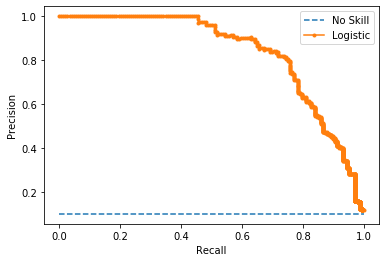

In [242]:
# predicting probabilities
lr_probs = model.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predicting class values
yhat = model.predict(x_test_1)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarizing the scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plotting the precision-recall curves
no_skill_lr = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_lr, no_skill_lr], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 3: Evaluating the model skill of KNN:

####  1. Precision-Recall graph:

KNN: f1=0.398 auc=0.490


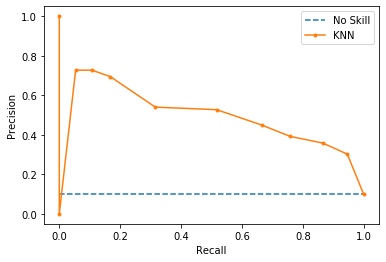

In [250]:
# predicting probabilities
knn_probs = knn.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
# predicting class values
yhat = knn.predict(x_test_1)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, yhat), auc(knn_recall, knn_precision)
# summarizing scores
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
# plotting the precision-recall curves
no_skill_knn = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_knn, no_skill_knn], linestyle='--', label='No Skill')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Step 4: Evaluating the model skill of Naive bayes:

####  1. Precision-Recall graph:

GN: f1=0.521 auc=0.583


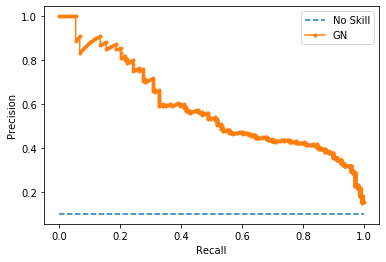

In [252]:
# predicting probabilities
GN_probs = GN.predict_proba(x_test_1)
# keeping probabilities for the positive outcome only
GN_probs = GN_probs[:, 1]
# predicting class values
yhat = GN.predict(x_test_1)
GN_precision, GN_recall, _ = precision_recall_curve(y_test, GN_probs)
GN_f1, GN_auc = f1_score(y_test, yhat), auc(GN_recall, GN_precision)
# summarizing scores
print('GN: f1=%.3f auc=%.3f' % (GN_f1, GN_auc))
# plotting the precision-recall curves
no_skill_GN = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill_GN, no_skill_GN], linestyle='--', label='No Skill')
plt.plot(GN_recall, GN_precision, marker='.', label='GN')
plt.xlabel('Recall')
plt.ylabel('Precision')
# showing the legend
plt.legend()
# showing the plot
plt.show()

#### Combined Inference on the outputs from model skill evaluation in steps 1, 2 &3:

1. A skilled model in the Precision-Recall graph is indicated as plot bowed at (1,1).
2. In Our above three Graph Logistc Regression model as the plot bowing toward (1,1) but not bowed at (1,1).
3. Also among above three plots it can be observed that area under the curve is more for the logistic regression model.

            Therefore, it can be seen that the logistic regression model is well skilled. A good skilled model is one that assigns higher probablity values to randomly choosen real positive occurence than a negative occurence on average. Let us also come to final conclusion based on the performance measurement using the confusion matrix.

### 2. Compring the model performance using the Confusion Matrix:

#### Confusion Matrix of the models built using Logistic Regression, K Nearest Neighbours and Naive Baye's algos:

##### a.Logistic Regression

[[1341   10]
 [  57   92]]


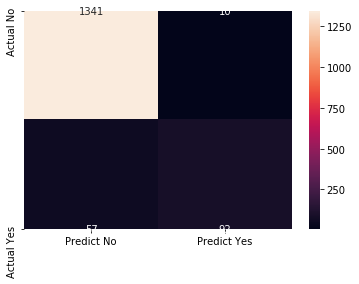

In [278]:
lr_cm = metrics.confusion_matrix(y_test, y_predict_testing_LR) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(lr_cm)
lr_df_cm = pd.DataFrame(lr_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(lr_df_cm, annot=True,fmt= 'd') #Visualizing the Confusion matrix

##### Inference on the above outputs:
1. TP = 92
2. TN = 1341
3. FN = 57
4. FP = 10

In [277]:
print(metrics.classification_report(y_test, y_predict_testing_LR)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.62      0.73       149

    accuracy                           0.96      1500
   macro avg       0.93      0.81      0.85      1500
weighted avg       0.95      0.96      0.95      1500



In [249]:
LR_f1= f1_score(y_test, y_predict_testing_LR) #Extracting the F1 Score.
LR_f1

0.7330677290836654

##### Inference on the above outputs:
1. Precision = 90%
2. Recall    = 62%
3. F1 measure = 73.31%
    

##### b.KNN:

[[1299   52]
 [  93   56]]


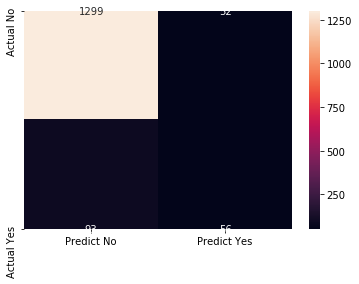

In [307]:
knn_cm = metrics.confusion_matrix(y_test, y_test_pred_knn) #Formulatting the confusion matrix using inbuilt function of sklearn
print(knn_cm)
knn_df_cm = pd.DataFrame(knn_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(knn_df_cm, annot=True,fmt= 'd') #Visualizing the Confusion matrix

##### Inference on the above outputs:
1. TP = 47
2. TN = 1311
3. FN = 102
4. FP = 40

In [308]:
print(metrics.classification_report(y_test, y_test_pred_knn)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1351
           1       0.52      0.38      0.44       149

    accuracy                           0.90      1500
   macro avg       0.73      0.67      0.69      1500
weighted avg       0.89      0.90      0.90      1500



In [284]:
knn_f1= f1_score(y_test, y_test_pred_knn) #Extracting the F1 Score.
knn_f1

0.3983050847457627

##### Inference on the above outputs:
1. Precision = 54%
2. Recall    = 32%
3. F1 measure = 39.83%
    

##### c.Naive bayes:

[[1253   98]
 [  62   87]]


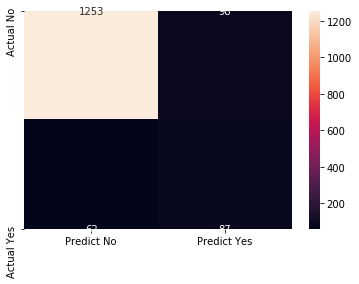

In [289]:
GN_cm = metrics.confusion_matrix(y_test, y_test_pred__GN) #Formulatting the confusion matrix using inbuilt function of sklearn.
print(GN_cm)
GN_df_cm = pd.DataFrame(GN_cm, index =[i for i in ["Actual No","Actual Yes"]] , columns = [i for i in ["Predict No","Predict Yes"]])
sns.heatmap(GN_df_cm, annot=True,fmt= 'd')#Visualizing the Confusion matrix

##### Inference on the above outputs:
1. TP = 87
2. TN = 1253
3. FN = 62
4. FP = 98

In [291]:
print(metrics.classification_report(y_test,y_test_pred__GN)) #Extracting the classifcication report.

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1351
           1       0.47      0.58      0.52       149

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.90      1500



In [292]:
GN_f1= f1_score(y_test, y_test_pred__GN) #Extracting the F1 Score.
GN_f1

0.5209580838323354

##### Inference on the above outputs:
1. Precision = 47%
2. Recall    = 58%
3. F1 measure = 52%
    

##### Combined Inferences on above Confusion matrices:

1. As mentioned previously important performance measure for our case is F1 measure.
2. It can be found from above confusion matrices that F1 measure  of Logistic Regression which is 73.31% seems to be better than F1 measures of other two algorithms.  
3. Also, Logistic Regression have very high model skill compared to other models.

### Conclusion:

1. Initially the given data was understood using the all Exploratory Data Analytics.
2. Using the understanding unnecessary columns were dropped.
3. The data were split in the ratio 70:30 for training and testing data respectively.
4. Then, the models were built using the Logistic Regression, K Nearest Neighbours and Naive Baye's model.
5. Decision on the necessary performance measure to evaluate the model was decided as F1 measure.
6. The skill of the models were evaluated and it was found that Logistic Regression have very good skill becase it had AUC in precision-recall graph around 0.838 which is better than other models.
7. Then performance of the model was evaluated and found that Logistic Regressioin model had very good F1 measure performance of 73.31%.
8. Therefore, based on the above points it can be said that model built using Logistic Regression can be used to host campign with target marketing as the model is capable of doing very good classification and targeting potential customers with balance between false positive and negatives which will incur the cost for this business.
9. There are also chance to improve the model by reducing the imbalance by doing over or under sampling.
10. The model can also be improved using log or exponential transformation.
11. In logistic regression algorithm's model we can also further tune by using Principal Component Analysis to sort out important feaures or converting the coefficients(as they are in exponentatial) into linear and identify the important features, In that case the result might have been different.

=====================================================================================================================